In [1]:
#%run /media/mauri/62882B44882B15D7/Universidad/Codes/Funciones.ipynb
%run "G:\Mi unidad\Work\Universidad\Codes\Funciones_win.ipynb"

In [2]:
import numpy
print (numpy.version.version)

1.21.5


In [3]:
la=[]

In [4]:
la.append([1,2])
la

[[1, 2]]

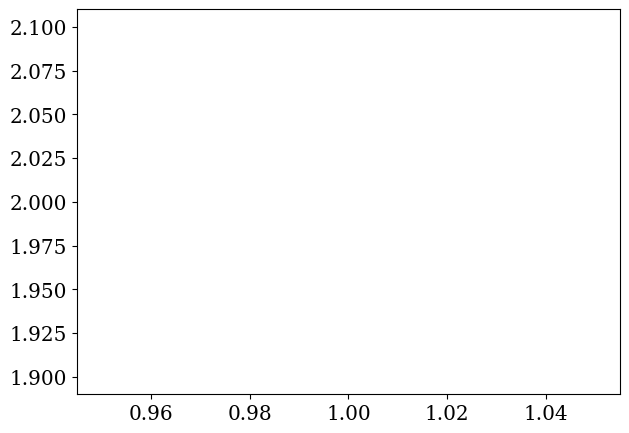

In [5]:
spec_prom=la
df_spec_prom=pd.DataFrame(spec_prom)
plt.plot(df_spec_prom[0],df_spec_prom[1],'--',label='prom',color='black')

In [6]:
df_spec_prom[0]

0    1
Name: 0, dtype: int64

In [2]:
#leemos el espectro
name='PTF12gzk'
tipo='Ibc'

ESPECTRO,fases=leer_spec("G:\\Mi unidad\\Work\\Universidad\\Phd\\Practica2\\Ibc new sample\\spectra_splines_despiked\\"+name+"_spline",MJD=True)
#ESPECTRO,fases=leer_spec('/media/mauri/62882B44882B15D7/Universidad/Phd/Practica2/Spectra_unidos/'+tipo+'/'+name+'_spectra.dat',MJD=True)

#ESPECTRO,fases=leer_spec('/home/mauri/Escritorio/Universidad/Phd/Practica2/SNdata_oldpractice/Supernovas_def/Spectra_spline_despiked/'+tipo+'/'+name+'_spline.txt',MJD=True)
#if len(fases)<1:
#    ESPECTRO,fases=leer_spec('/media/mauri/62882B44882B15D7/Universidad/Phd/Practica2/Spectra_smoth_despiked/'+tipo+'/'+name+'_spectra.dat',MJD=True)

In [3]:
fases

[56135,
 56136,
 56140,
 56140,
 56141,
 56143,
 56145,
 56146,
 56147,
 56148,
 56148,
 56148,
 56149,
 56149,
 56149,
 56149,
 56150,
 56150,
 56150,
 56150,
 56151,
 56151,
 56151,
 56151,
 56151,
 56152,
 56152,
 56152,
 56157,
 56158,
 56162,
 56164,
 56164,
 56165,
 56176,
 56176,
 56176,
 56177,
 56177,
 56177,
 56177,
 56179,
 56179,
 56180,
 56180,
 56186,
 56187,
 56188,
 56193,
 56193,
 56193,
 56193,
 56195,
 56195,
 56205,
 56206,
 56214,
 56215,
 56215,
 56216,
 56216,
 56217,
 56217,
 56237,
 56245,
 56246,
 56251,
 56268,
 56453]

In [4]:
len(fases)

69

In [97]:
#path_lc='/media/mauri/62882B44882B15D7/Universidad/Phd/Practica2/Photometry_unidas2/'+tipo+'_loess_unidas/'+name+'_photometry.dat'
#path_lc='/home/mauri/Escritorio/Universidad/Phd/Practica2/SNdata_oldpractice/Supernovas_def/Photometry_original/'+tipo+'/'+name+'_photometry.dat'
path_lc="G:\\Mi unidad\\Work\\Universidad\\Phd\\Practica2\\Ibc new sample\\photometry_unidas2\\Ibc_loess_unidas\\"+name+"_photometry.dat"
FILTRO,filtros=data_curvas(path_lc)
filtros

C:\Users\mrami\anaconda3\envs\ALR_37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  after removing the cwd from sys.path.


['R', 'B', 'i', 'r', 'g', 'I', 'V']

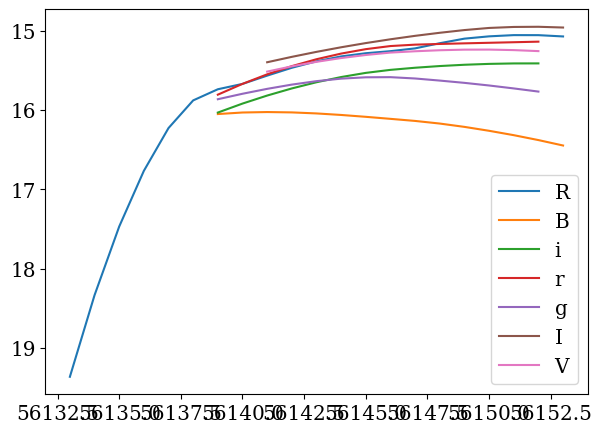

In [98]:
for i in range(len(filtros)):
    plt.plot(FILTRO[i][0],FILTRO[i][1],label=filtros[i])
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [7]:
path_abs="G:\\Mi Unidad"
print(os.path.join( path_abs,"Work", "Universidad","Phd","Practica2","Ibc new sample","photometry"))


G:\Mi Unidad\Work\Universidad\Phd\Practica2\Ibc new sample\photometry


In [8]:
#pasamos los espectros a DATAFRAMES
for i in range(len(ESPECTRO)):
    ESPECTRO[i]=pd.DataFrame(ESPECTRO[i],columns=['wave','flux'],dtype='float64')

In [92]:
#calculamos repetidos otra vez
from collections import defaultdict

Ubicaciones = defaultdict(list)
for index in range(len(fases)):
    Ubicaciones[fases[index]].append(index)
Ubicaciones

defaultdict(list,
            {56135: [0],
             56136: [1],
             56140: [2],
             56141: [3],
             56145: [4],
             56147: [5],
             56148: [6],
             56149: [7, 8, 9],
             56150: [10, 11, 12],
             56151: [13],
             56152: [14],
             56157: [15],
             56158: [16],
             56162: [17],
             56164: [18, 19],
             56176: [20, 21, 22],
             56177: [23, 24, 25, 26],
             56180: [27, 28],
             56186: [29],
             56188: [30],
             56193: [31, 32, 33, 34],
             56195: [35],
             56205: [36],
             56206: [37],
             56214: [38],
             56215: [39],
             56217: [40, 41],
             56237: [42],
             56245: [43],
             56246: [44],
             56251: [45],
             56268: [46],
             56453: [47]})

In [42]:
def remove_spec(name,fases,ESPECTRO,posicion=0):
     for i in range(len(fases)):
        if fases[i]==name:
            #c.append(i)
            ESPECTRO.pop(i+posicion)
            fases.pop(i+posicion)
            print('Eliminado')
            break


In [91]:
#Quieres remover un espectro?
remove_spec(56151,fases,ESPECTRO,0)

Eliminado


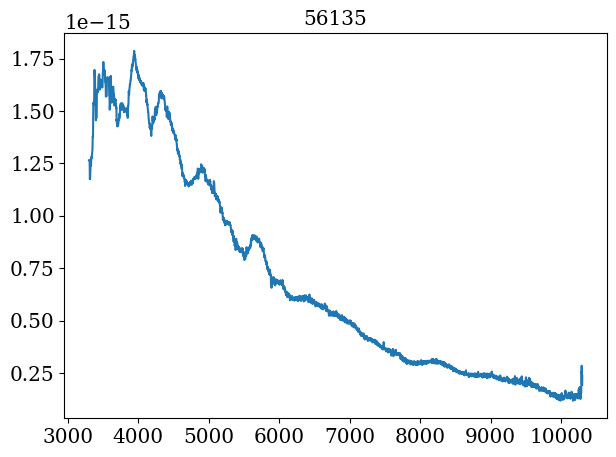

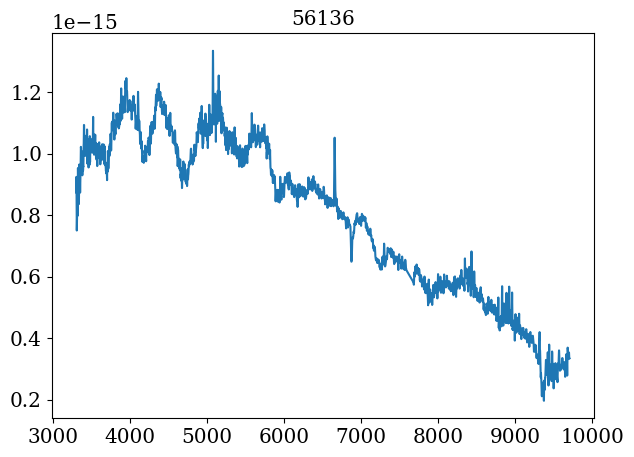

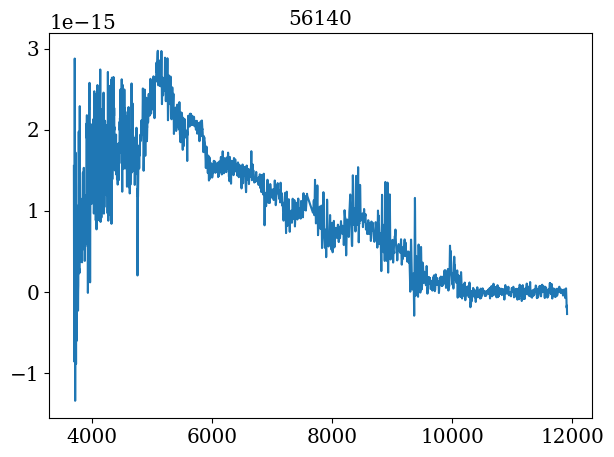

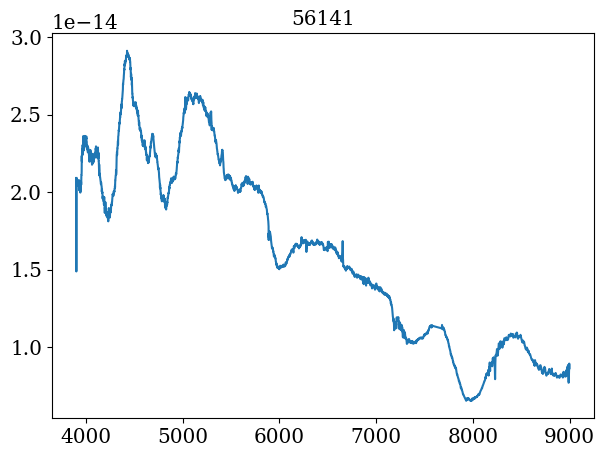

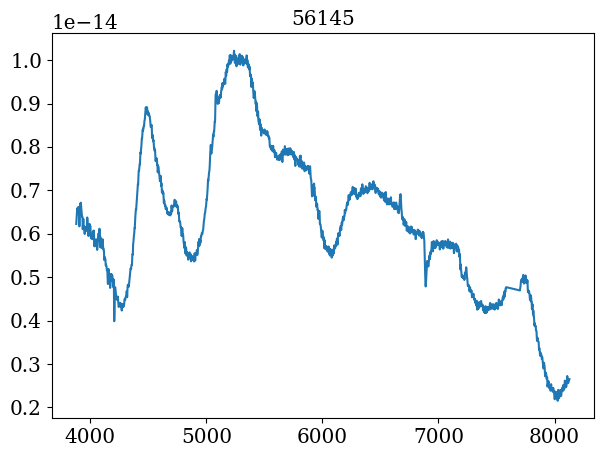

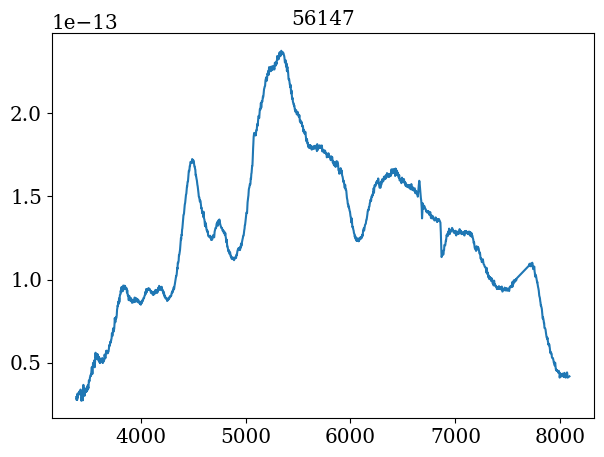

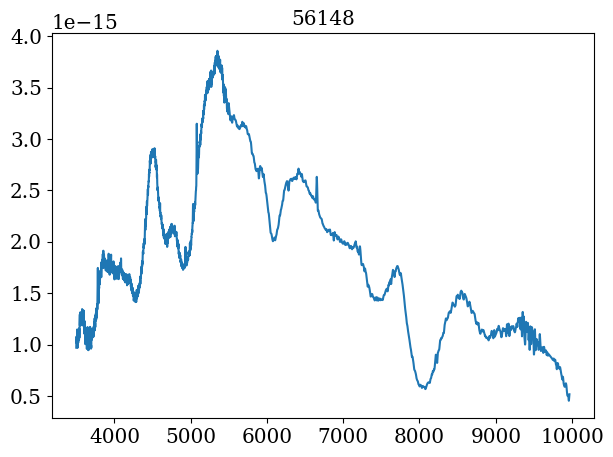

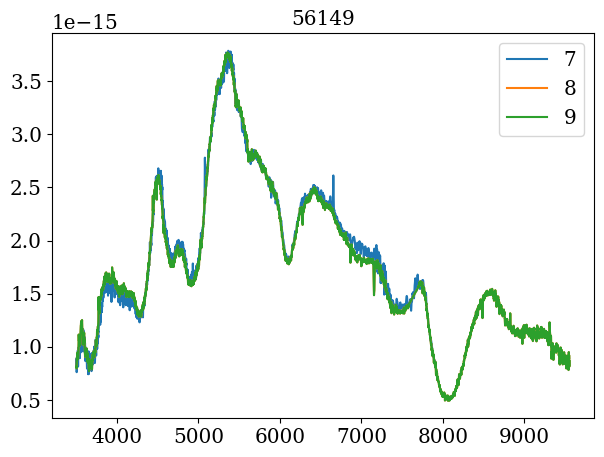

repite


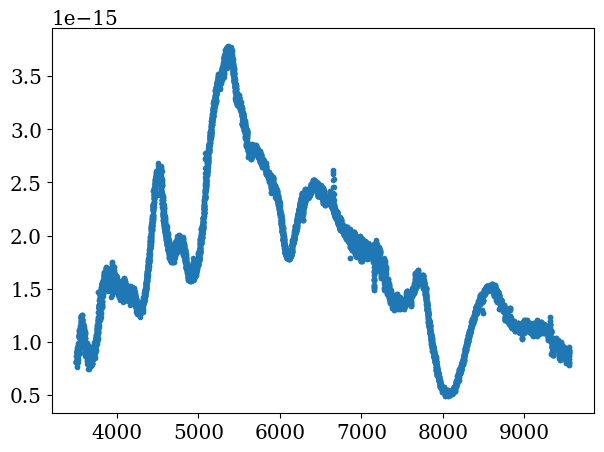

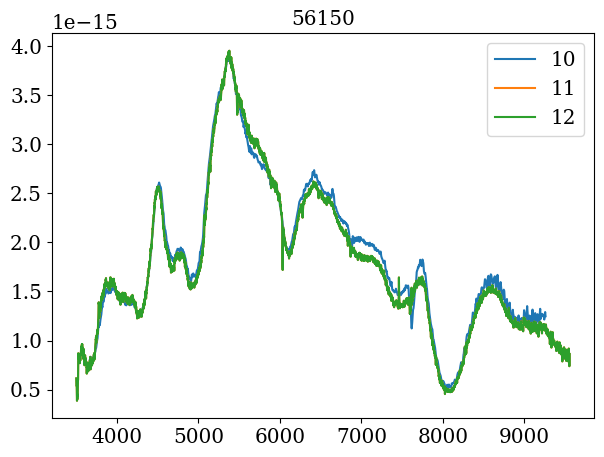

repite


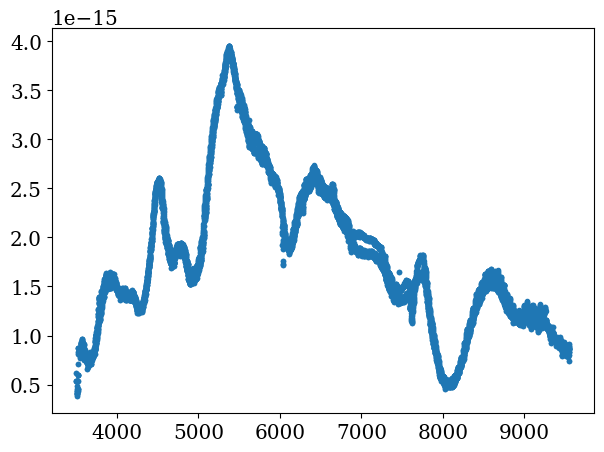

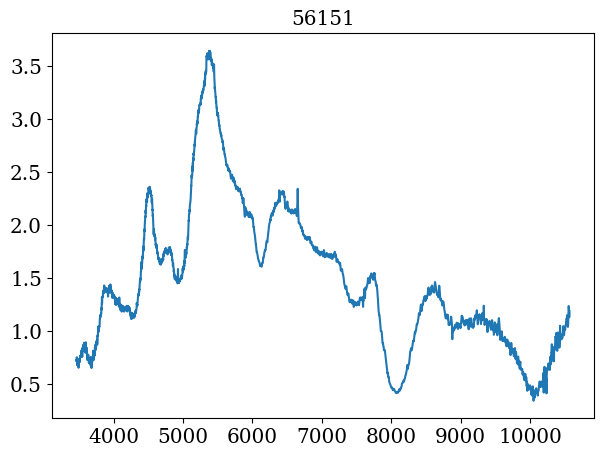

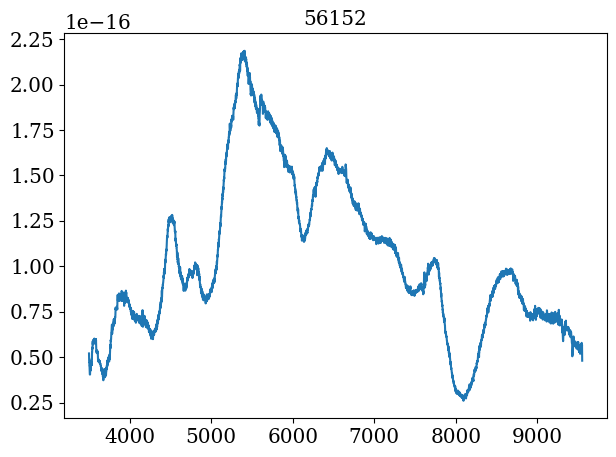

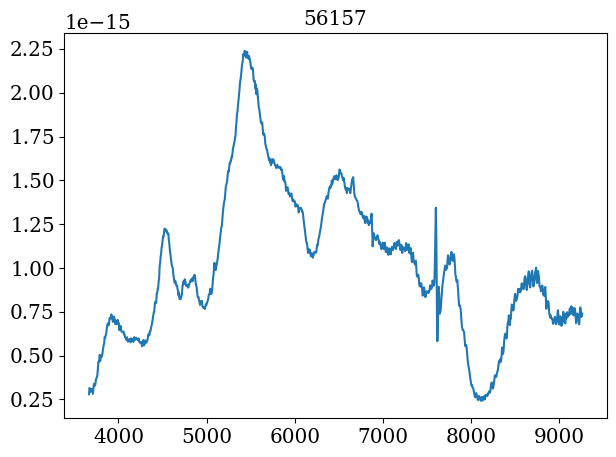

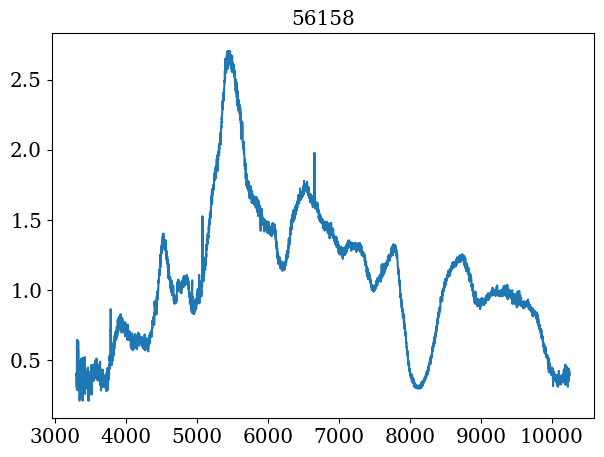

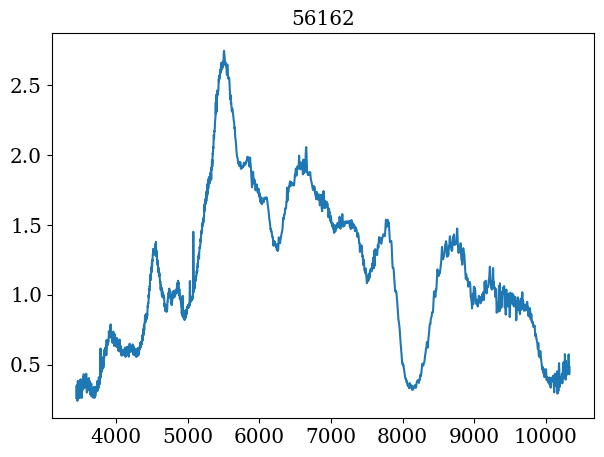

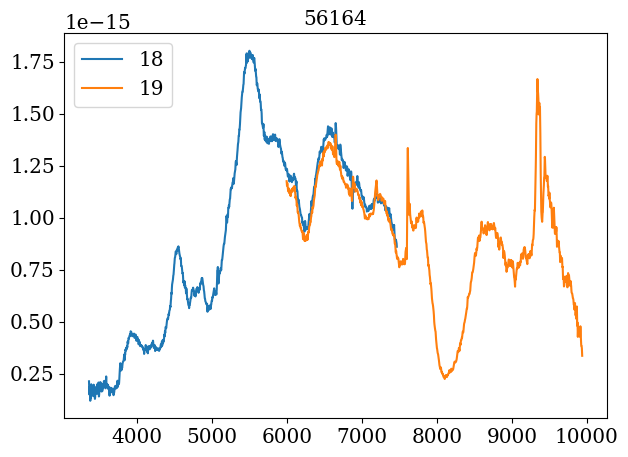

repite


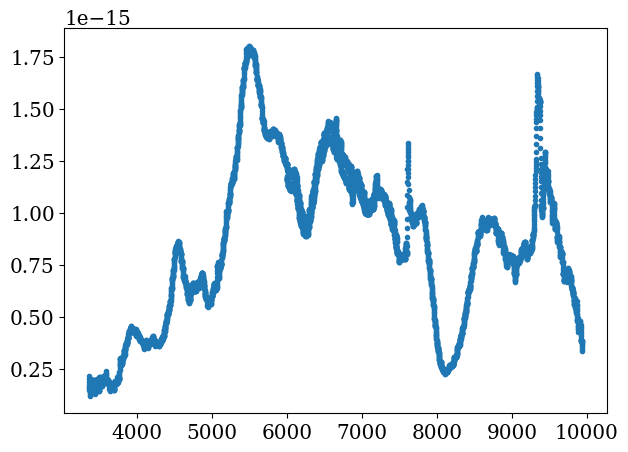

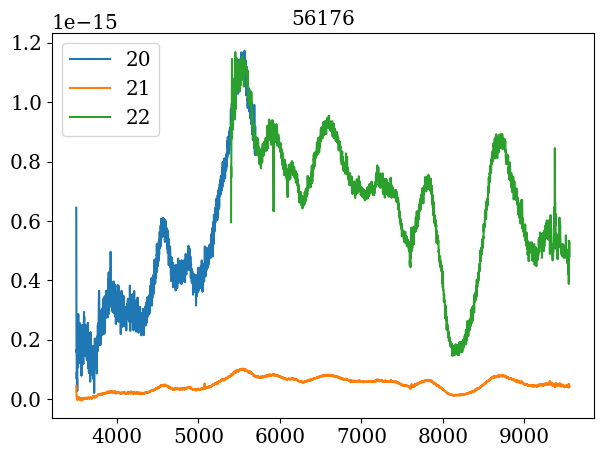

repite


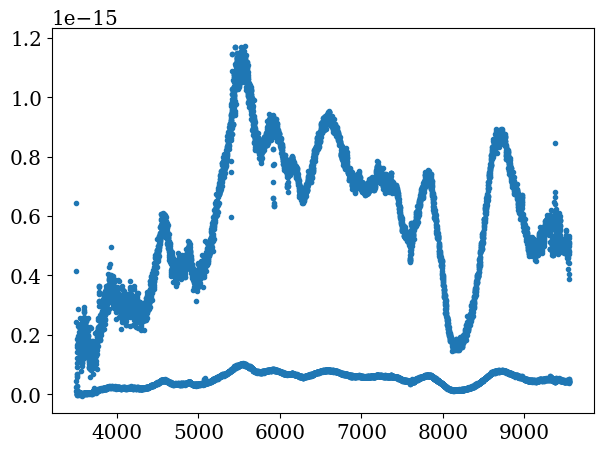

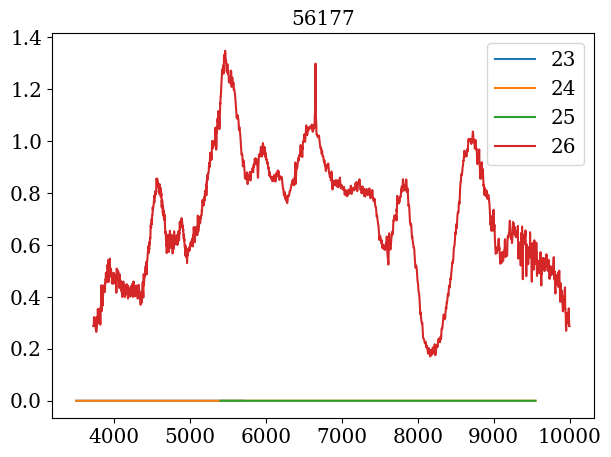

repite


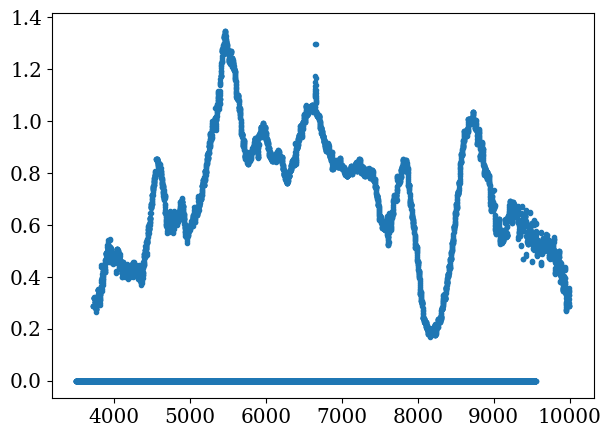

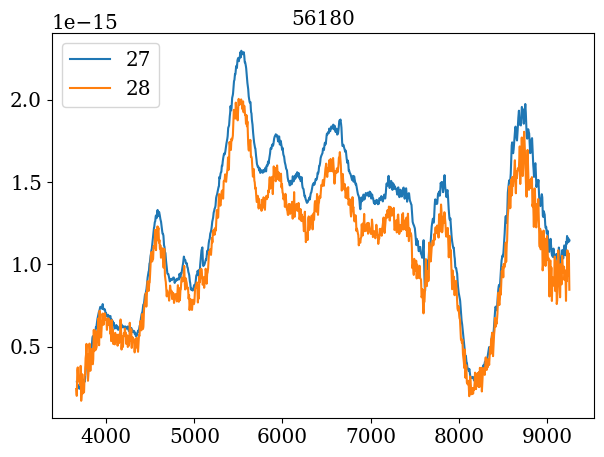

repite


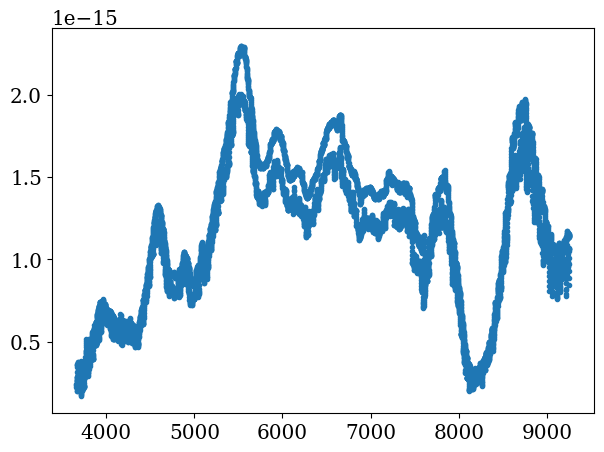

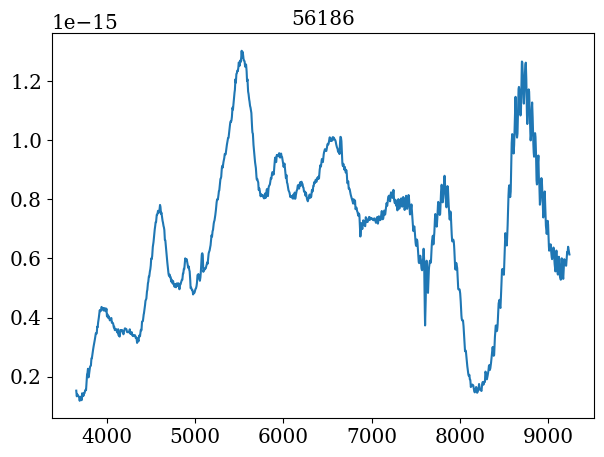

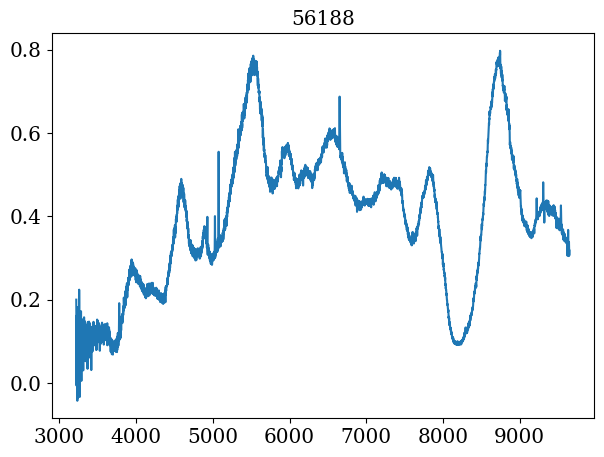

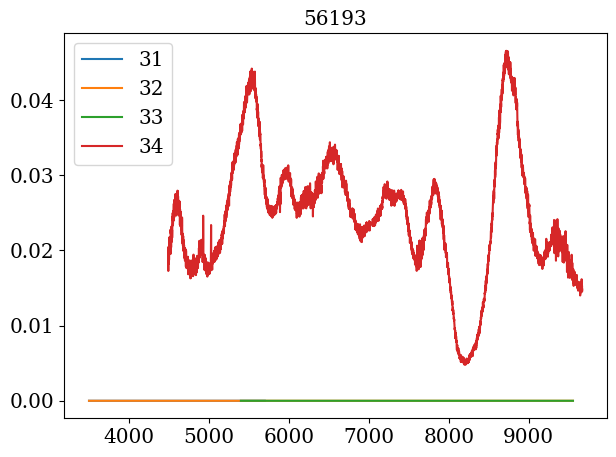

repite


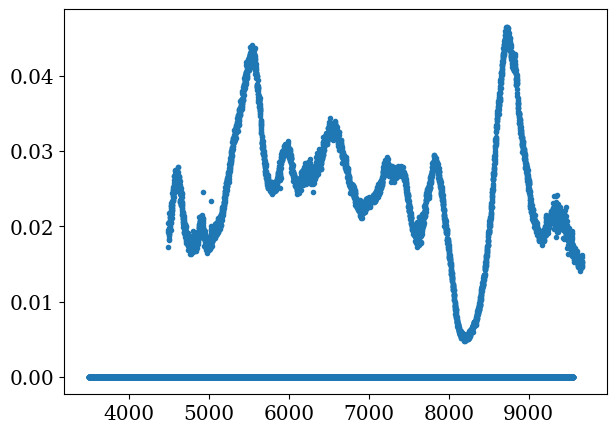

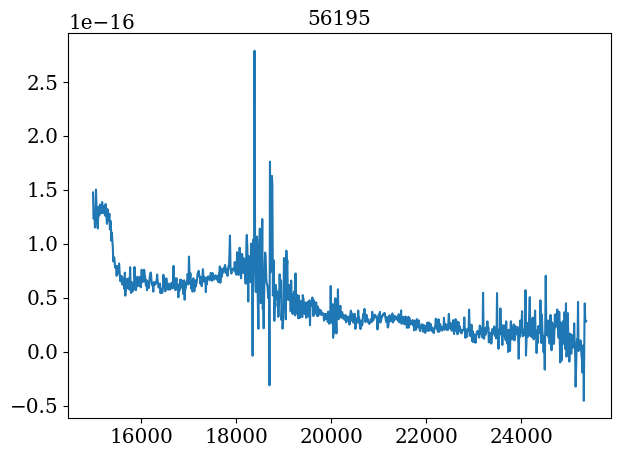

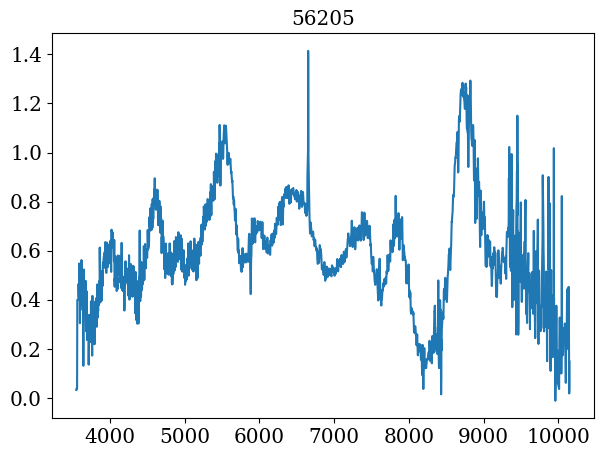

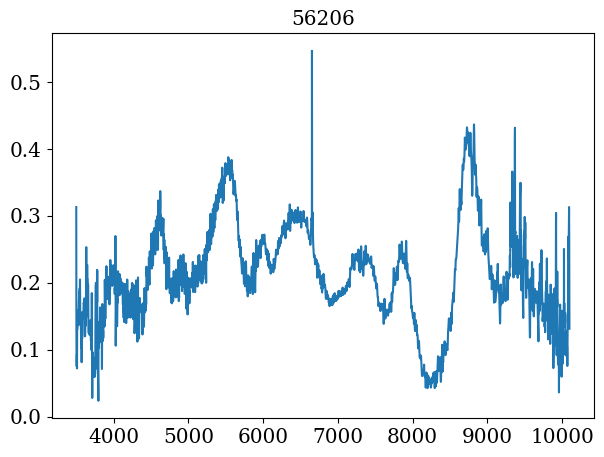

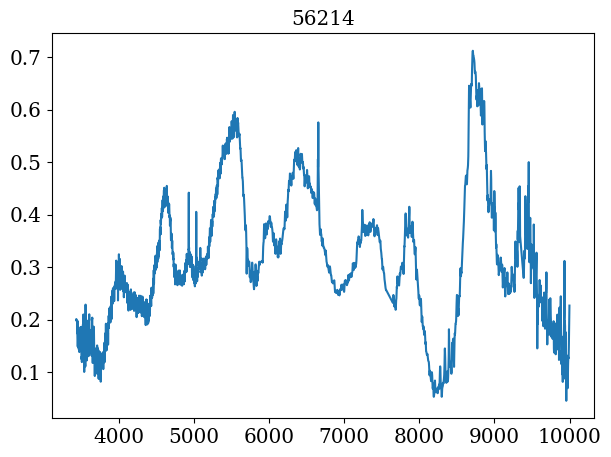

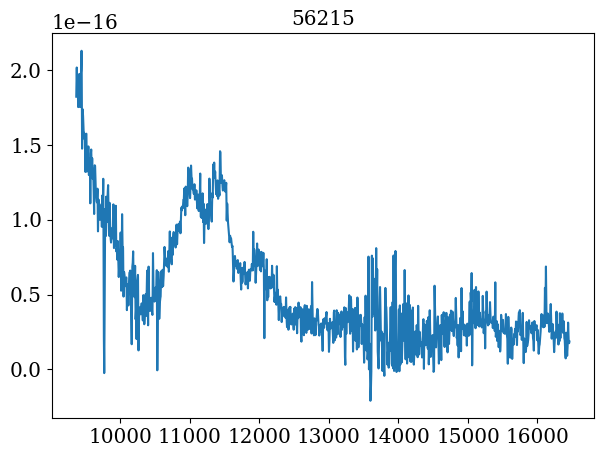

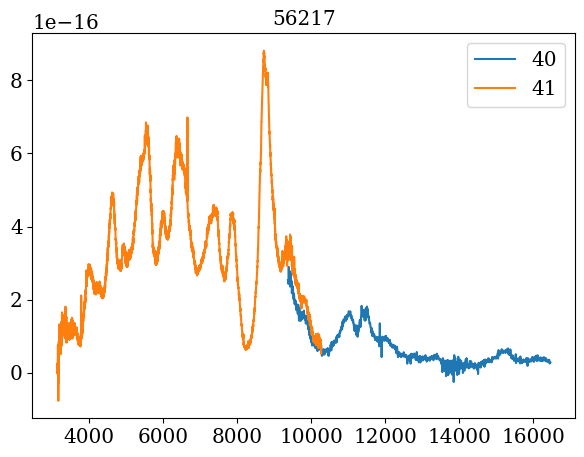

repite


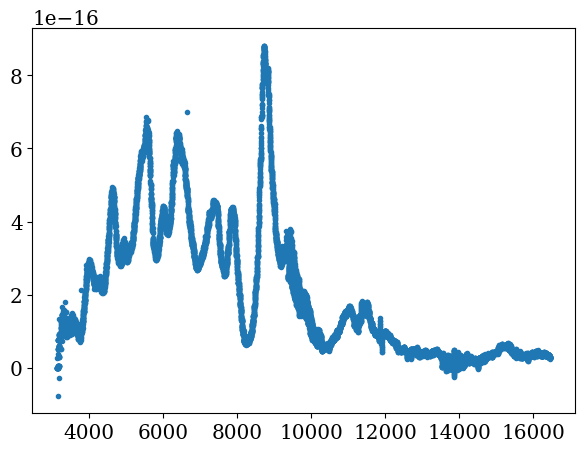

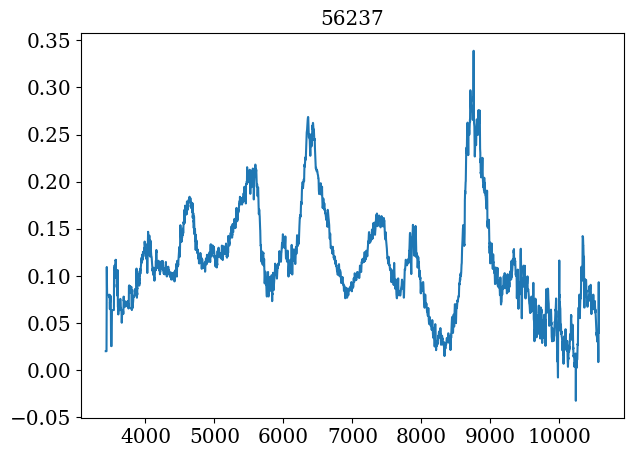

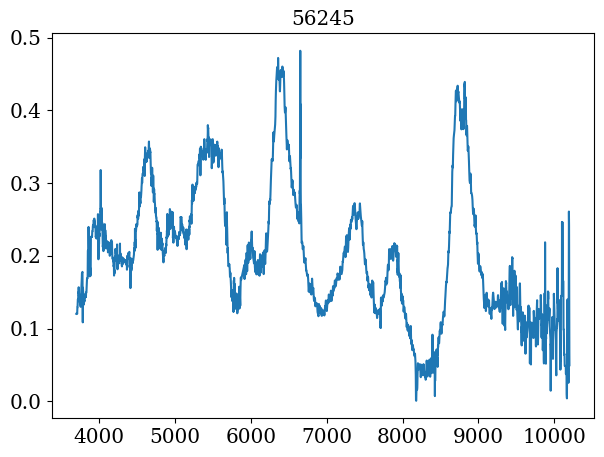

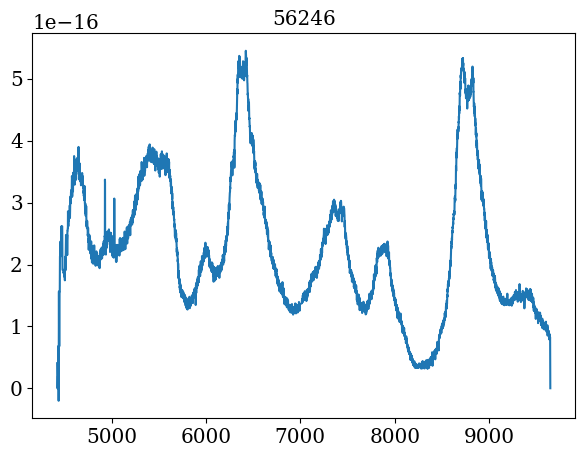

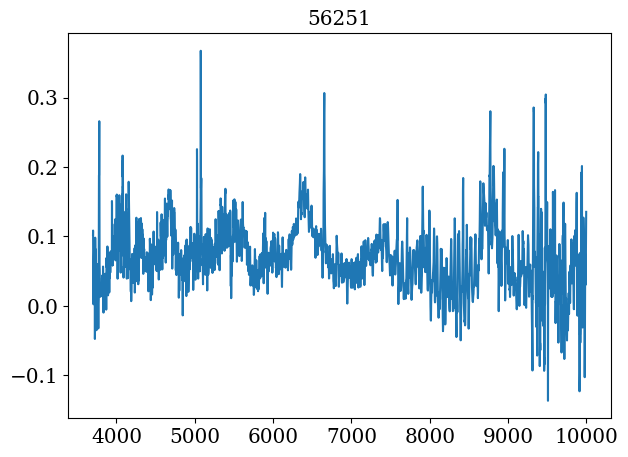

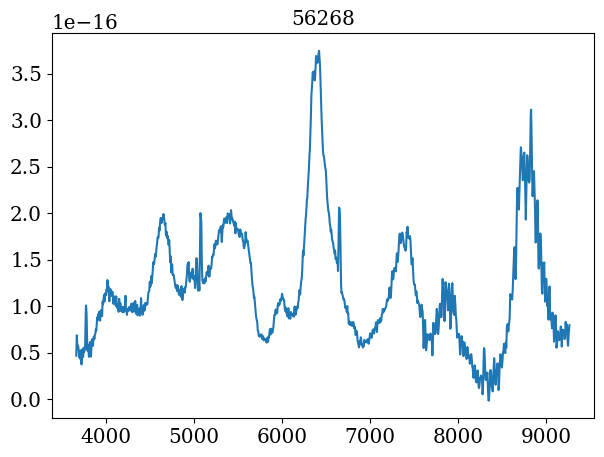

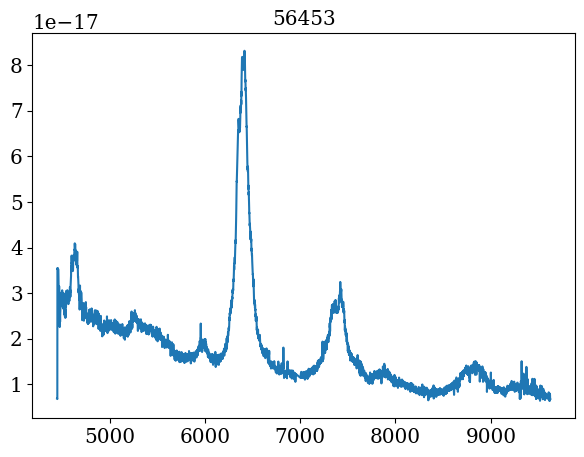

In [93]:
##ploteamos otra vez a ver si se eliminaron realmente
new_espectro=[]
new_fases=[]

for i in Ubicaciones.keys():
    espectro=pd.DataFrame([])
            
    if len(Ubicaciones[i])>1:
        for j in Ubicaciones[i]:
            ESPECTRO_df=ESPECTRO[j]
            plt.plot(ESPECTRO_df['wave'],ESPECTRO_df['flux'],label=j)
            espectro=pd.concat((espectro,ESPECTRO_df),axis=0,ignore_index=True)
        plt.legend()
        plt.title(i)
        plt.show()
        print('repite')
        plt.plot(espectro['wave'],espectro['flux'],'.')
        plt.show()
        new_espectro.append(espectro)
        
    else:
        new_espectro.append(ESPECTRO[Ubicaciones[i][0]])
        plt.plot(ESPECTRO[Ubicaciones[i][0]]['wave'],ESPECTRO[Ubicaciones[i][0]]['flux'])
        plt.title(i)
        plt.show()
    new_fases.append(i)

In [111]:
#remove_spec(56523,fases,ESPECTRO,1)

In [112]:
porcentajes=[]# Solo una vez

# Calibramos

In [35]:
#%run /media/mauri/62882B44882B15D7/Universidad/Codes/Funciones.ipynb
%run "G:\Mi unidad\Work\Universidad\Codes\Funciones_win.ipynb"

syn|percentage
(1.2630905115916488e-15, 1.0)


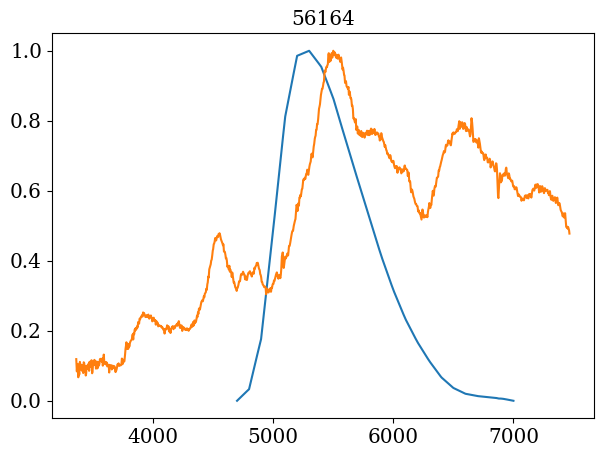

['R', 'B', 'i', 'r', 'g', 'I', 'V']
cteV
cteV cteV 3.67558126207669e-09
SINTETIC DATA FRAME
       mjd          flux
0  56164.0  1.263091e-15
No hay espectros dentro del rango de curva de luz


TypeError: cannot unpack non-iterable NoneType object

In [94]:
banda=['V']
pos1=18
spec1,porcentaje1=calibrar_spectra(ESPECTRO,pos1,banda,fases,FILTRO,filtros)


syn|percentage
(8.612150647710207e-16, 0.7906971087366437)


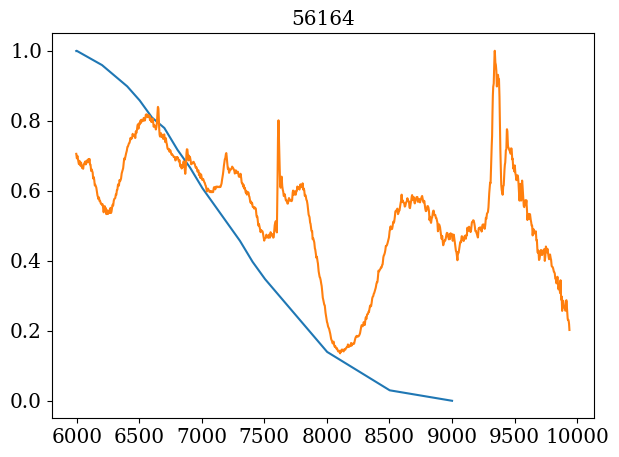

['R', 'B', 'i', 'r', 'g', 'I', 'V']
cter
cter cter 2.818556152283821e-09
SINTETIC DATA FRAME
       mjd          flux
0  56164.0  8.612151e-16
No hay espectros dentro del rango de curva de luz


TypeError: cannot unpack non-iterable NoneType object

In [96]:
banda=['r']
pos2=19
spec2,porcentaje2=calibrar_spectra(ESPECTRO,pos2,banda,fases,FILTRO,filtros)

syn|percentage
(1.6256769978978204e-15, 1.0)


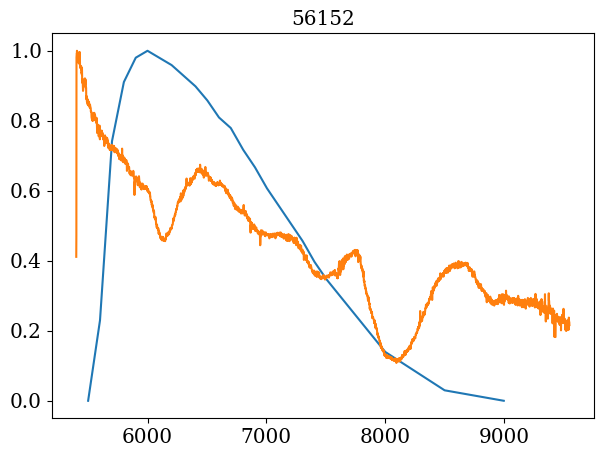

['R', 'B', 'i', 'r', 'g', 'I', 'V']
cteR
cteR cteR 2.2319872881446082e-09
SINTETIC DATA FRAME
       mjd          flux
0  56152.0  1.625677e-15


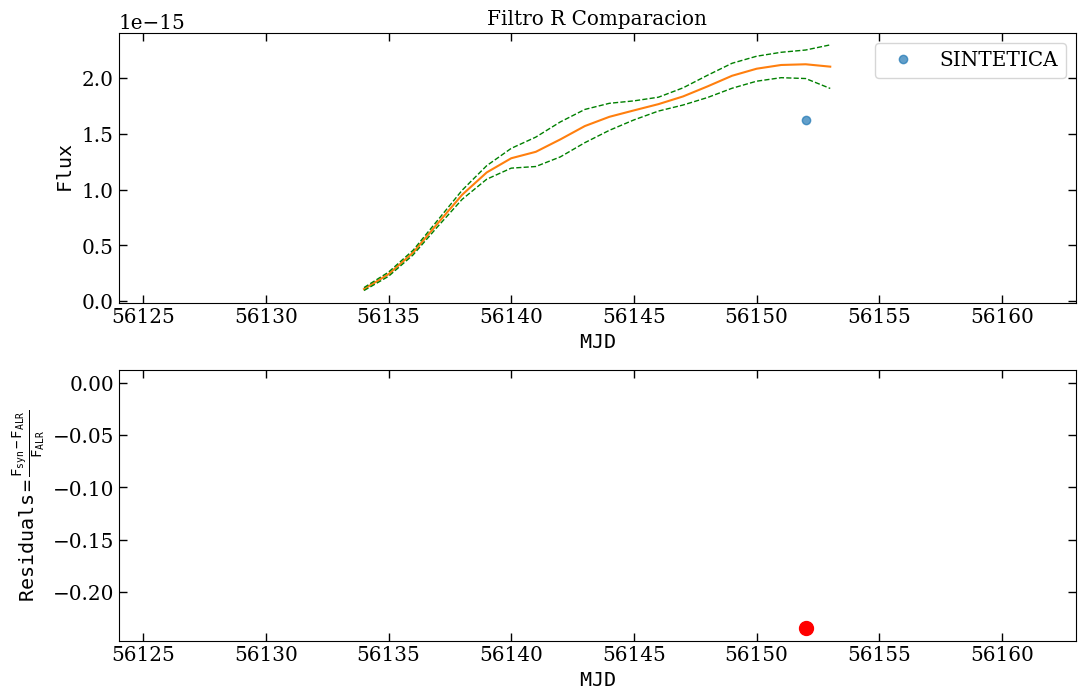

The alpha value for the ALR is: 0.43166902458763756
syn|percentage
(2.1241743679150347e-15, 1.0)
cteR
cteR cteR 2.2319872881446082e-09
SINTETIC DATA FRAME
       mjd          flux
0  56152.0  2.124174e-15


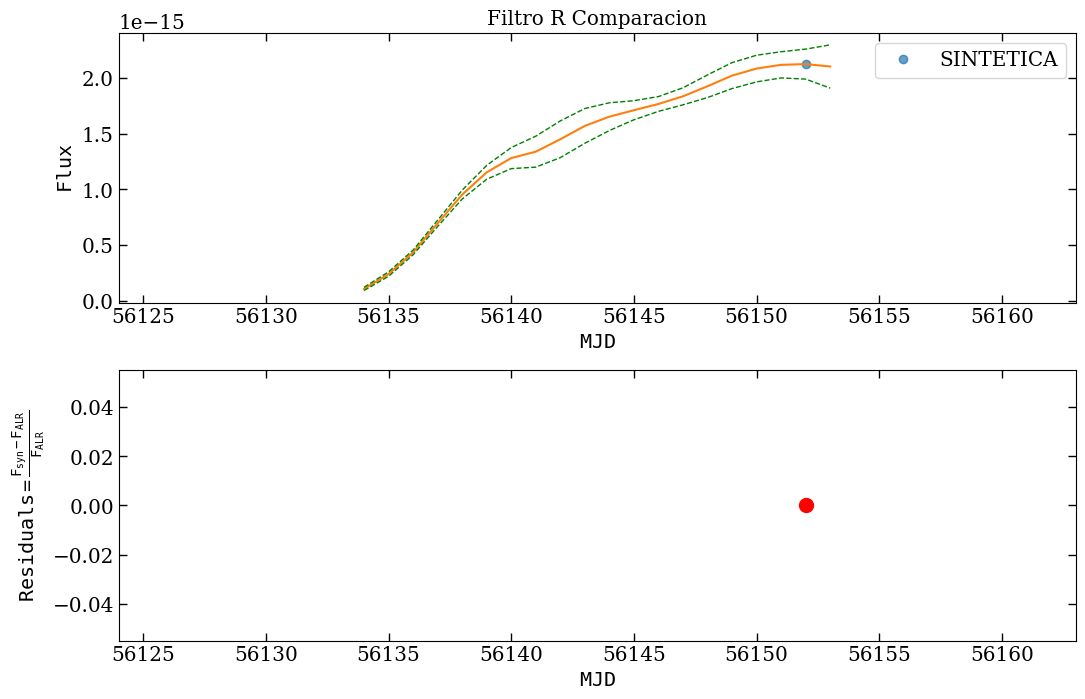

The alpha value for the ALR is: 0.43166902458763756


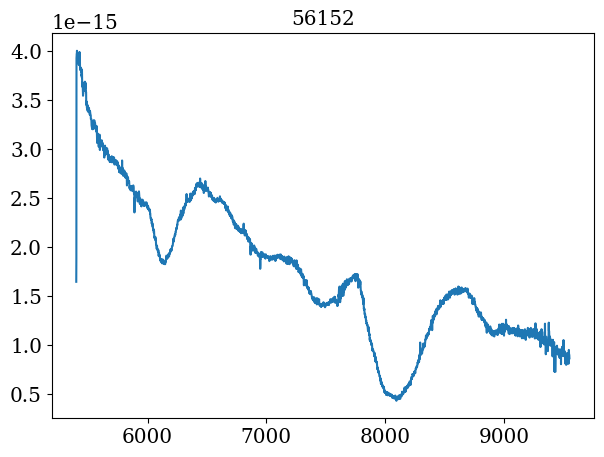

In [82]:
banda=['R']
pos3=20
spec3,porcentaje3=calibrar_spectra(ESPECTRO,pos3,banda,fases,FILTRO,filtros)

syn|percentage
(1.611182494564638e-16, 1.0)


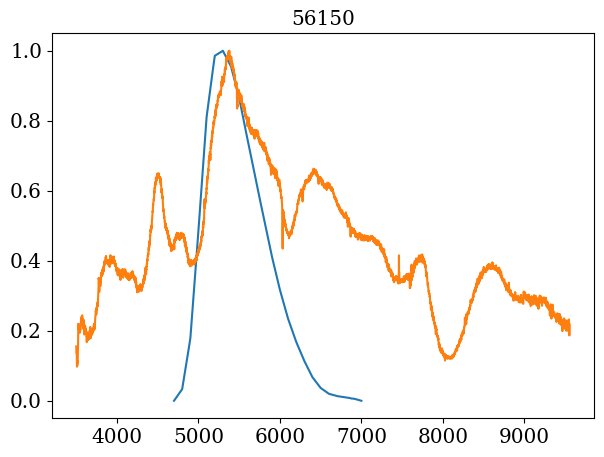

['R', 'B', 'i', 'r', 'g', 'I', 'V']
cteV
cteV cteV 3.67558126207669e-09
SINTETIC DATA FRAME
       mjd          flux
0  56150.0  1.611182e-16


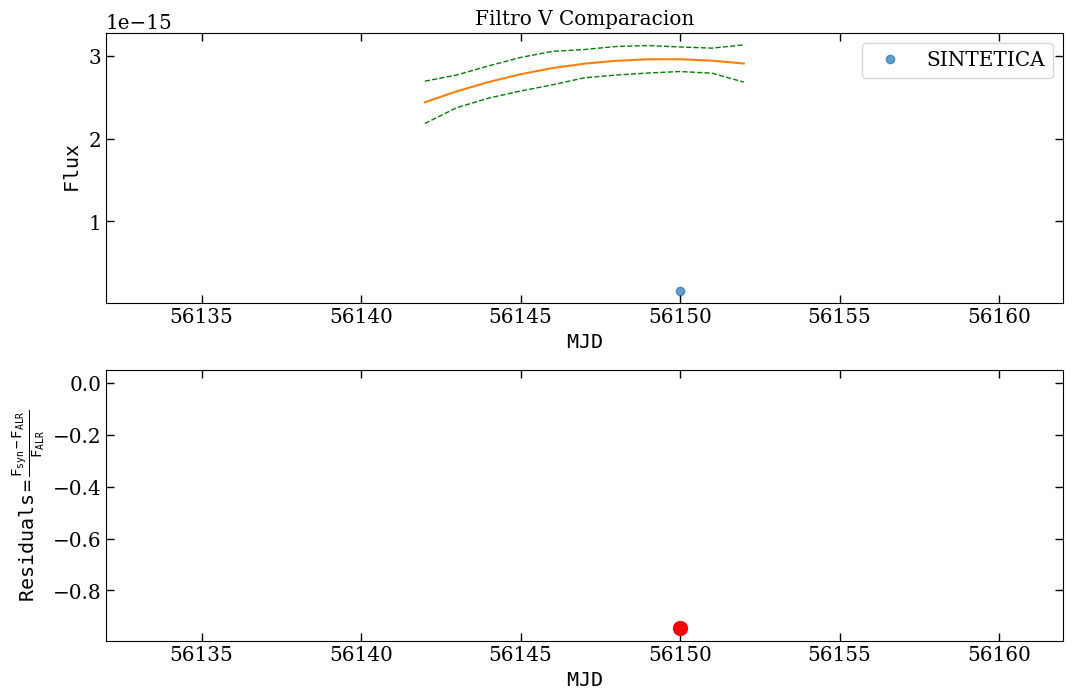

The alpha value for the ALR is: 0.958669262693832
syn|percentage
(2.9629012378847155e-15, 1.0)
cteV
cteV cteV 3.67558126207669e-09
SINTETIC DATA FRAME
       mjd          flux
0  56150.0  2.962901e-15


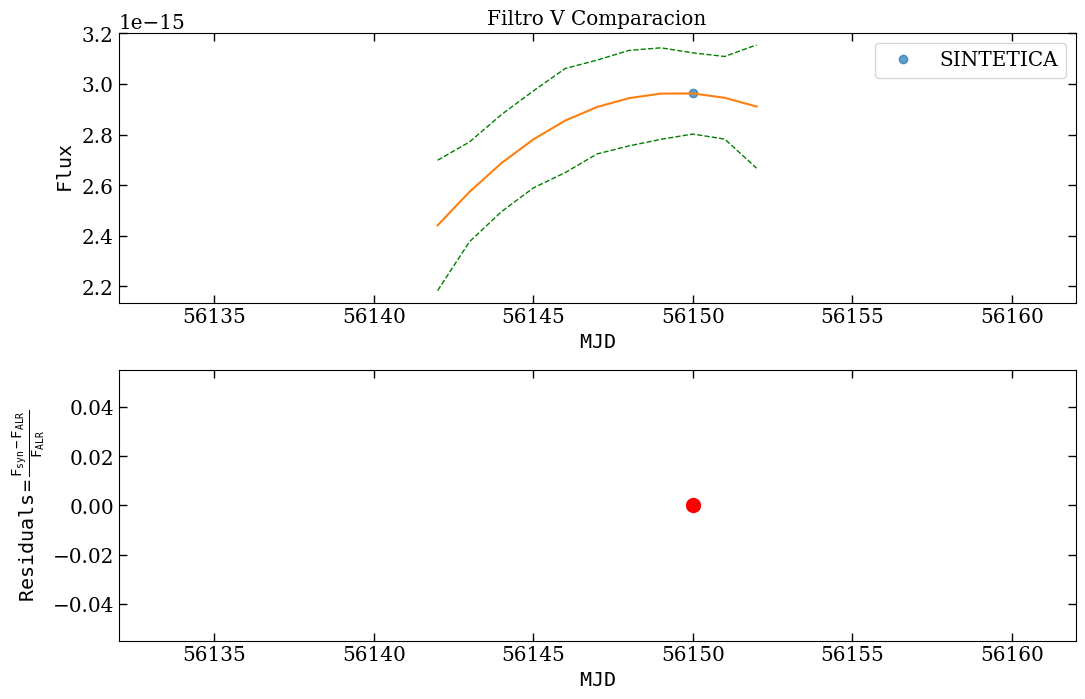

The alpha value for the ALR is: 0.9586692626938319


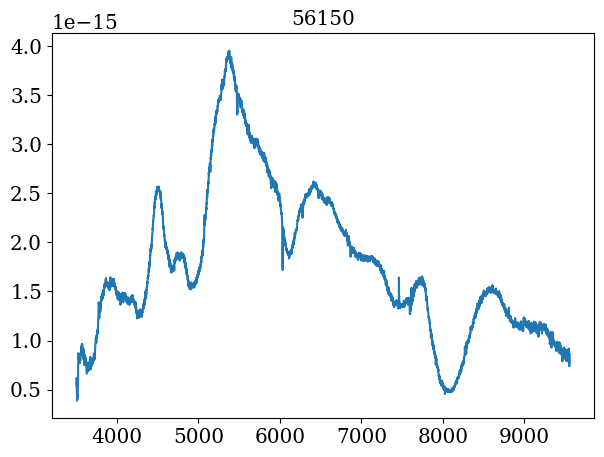

In [73]:
banda=['V']
pos4=13
spec4,porcentaje4=calibrar_spectra(ESPECTRO,pos3,banda,fases,FILTRO,filtros)

syn|percentage
(1.4556968393421504e-16, 1.0)


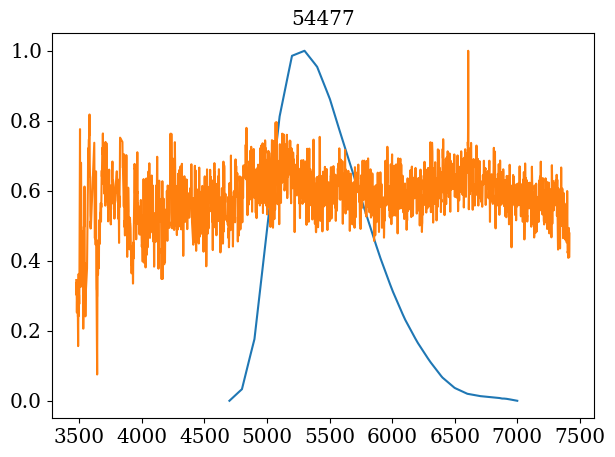

['B', 'I', 'R', 'V', 'U', 'i', 'r']
cteV
cteV cteV 3.67558126207669e-09
SINTETIC DATA FRAME
       mjd          flux
0  54477.0  1.455697e-16


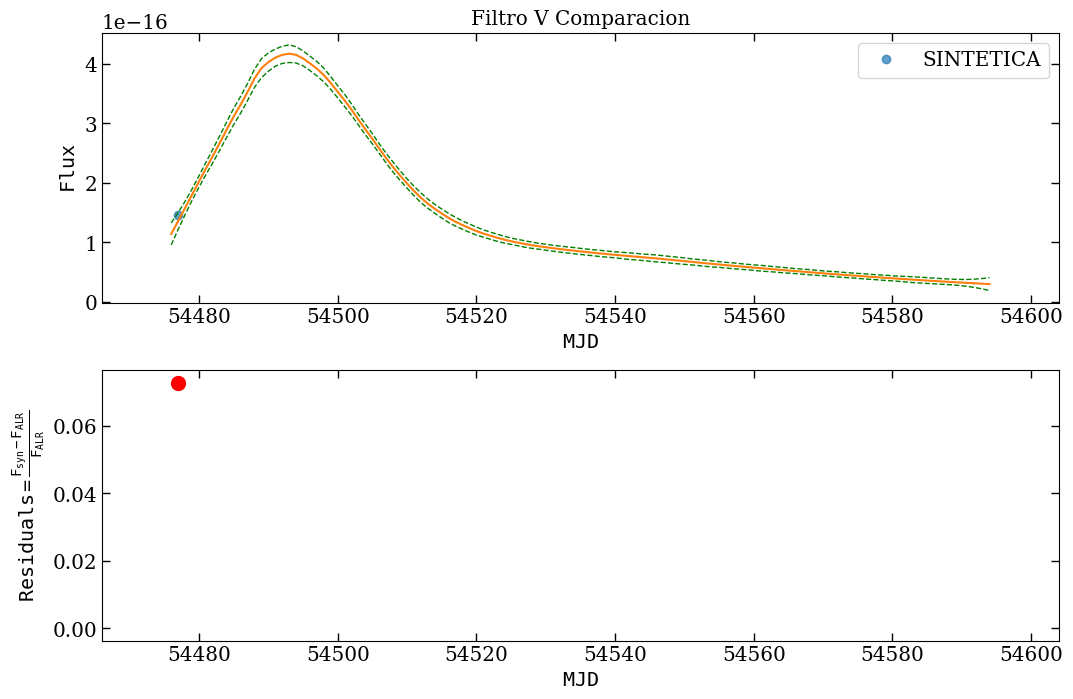

The alpha value for the ALR is: 0.20615015845419432
syn|percentage
(1.3569436437998698e-16, 1.0)
cteV
cteV cteV 3.67558126207669e-09
SINTETIC DATA FRAME
       mjd          flux
0  54477.0  1.356944e-16


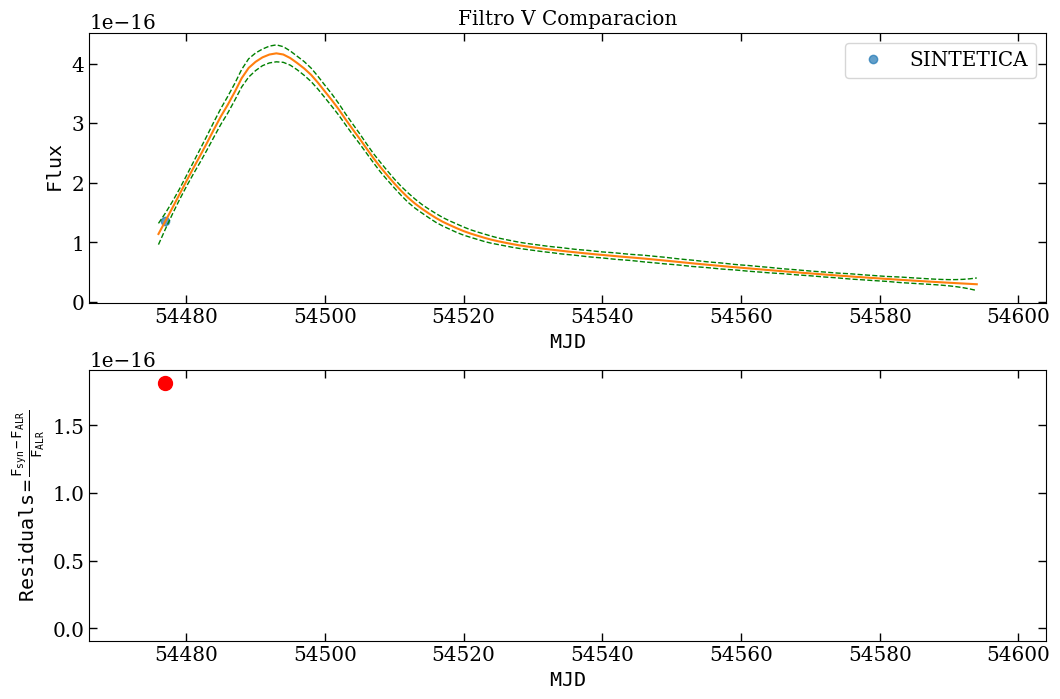

The alpha value for the ALR is: 0.20615015845419432


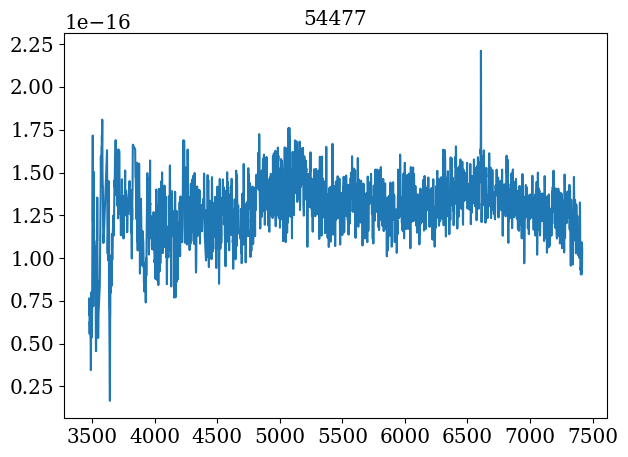

In [851]:
banda=['V']
pos5=13
spec5,porcentaje5=calibrar_spectra(ESPECTRO,pos3,banda,fases,FILTRO,filtros)

In [ ]:
banda=['V']
pos6=34
spec6,porcentaje6=calibrar_spectra(ESPECTRO,pos6,banda)

In [ ]:
banda=['V']
pos7=35
spec7,porcentaje7=calibrar_spectra(ESPECTRO,pos7,banda)

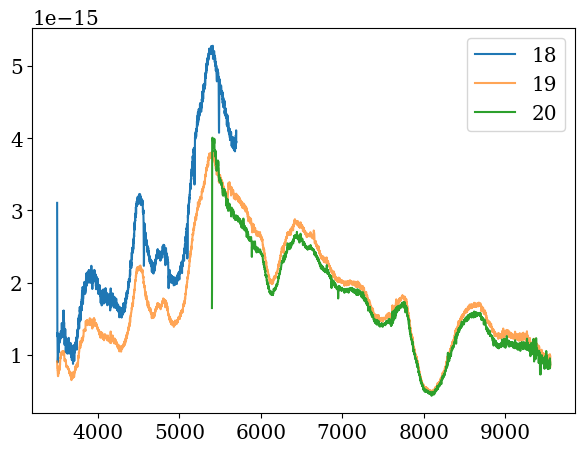

In [83]:

plt.plot(spec1['wave'],spec1['flux'],label=pos1)
plt.plot(spec2['wave'],spec2['flux'],label=pos2,alpha=0.7)
plt.plot(spec3['wave'],spec3['flux'],label=pos3)
#plt.plot(spec4['wave'],spec4['flux'],label=pos4)
#plt.plot(spec5['wave'],spec5['flux'],label=pos5)
#plt.plot(spec6['wave'],spec6['flux'],label=pos6)
#plt.plot(spec7['wave'],spec7['flux'],label=pos7)



plt.legend()

In [75]:
#si todo esta bien, la reemplazamos
ESPECTRO[pos1]=spec1
ESPECTRO[pos2]=spec2
ESPECTRO[pos3]=spec3
ESPECTRO[pos4]=spec4
#ESPECTRO[pos5]=spec5
#ESPECTRO[pos6]=spec6




In [270]:
porcentaje1,porcentaje2

(1.0, 1.0)

In [271]:
porcentaje_save1=porcentaje1
porcentaje_save2=porcentaje2

porcentaje_list=[porcentaje_save1,porcentaje_save2]
porcentaje_list

[1.0, 1.0]

In [272]:
#porcentajes*3

In [273]:
#porcentaje_list=[]
porcentajes=[]

In [274]:
porcentajes.append(porcentaje_list)

In [275]:
porcentajes

[[1.0, 1.0]]

In [276]:
len(porcentajes)

1

In [167]:
#porcentajes=[[1,1],[1,1]]
#porcentajes

In [168]:
#DIVIDIR UNO POR EL OTRO Y TOMAR UN PROMEDIO O MEDIANA ESE ES EL K

In [169]:
#Quieres remover un espectro? en el que no haya funcionado la correcion
#remove_spec(56265,fases,ESPECTRO,1)

In [99]:
#calculamos repetidos otra vez
from collections import defaultdict

Ubicaciones = defaultdict(list)
for index in range(len(fases)):
    Ubicaciones[fases[index]].append(index)
Ubicaciones

defaultdict(list,
            {56135: [0],
             56136: [1],
             56140: [2],
             56141: [3],
             56145: [4],
             56147: [5],
             56148: [6],
             56149: [7, 8, 9],
             56150: [10, 11, 12],
             56151: [13],
             56152: [14],
             56157: [15],
             56158: [16],
             56162: [17],
             56164: [18, 19],
             56176: [20, 21, 22],
             56177: [23, 24, 25, 26],
             56180: [27, 28],
             56186: [29],
             56188: [30],
             56193: [31, 32, 33, 34],
             56195: [35],
             56205: [36],
             56206: [37],
             56214: [38],
             56215: [39],
             56217: [40, 41],
             56237: [42],
             56245: [43],
             56246: [44],
             56251: [45],
             56268: [46],
             56453: [47]})

In [100]:
Ubicaciones

defaultdict(list,
            {56135: [0],
             56136: [1],
             56140: [2],
             56141: [3],
             56145: [4],
             56147: [5],
             56148: [6],
             56149: [7, 8, 9],
             56150: [10, 11, 12],
             56151: [13],
             56152: [14],
             56157: [15],
             56158: [16],
             56162: [17],
             56164: [18, 19],
             56176: [20, 21, 22],
             56177: [23, 24, 25, 26],
             56180: [27, 28],
             56186: [29],
             56188: [30],
             56193: [31, 32, 33, 34],
             56195: [35],
             56205: [36],
             56206: [37],
             56214: [38],
             56215: [39],
             56217: [40, 41],
             56237: [42],
             56245: [43],
             56246: [44],
             56251: [45],
             56268: [46],
             56453: [47]})

In [101]:
Ubicaciones.keys()

dict_keys([56135, 56136, 56140, 56141, 56145, 56147, 56148, 56149, 56150, 56151, 56152, 56157, 56158, 56162, 56164, 56176, 56177, 56180, 56186, 56188, 56193, 56195, 56205, 56206, 56214, 56215, 56217, 56237, 56245, 56246, 56251, 56268, 56453])

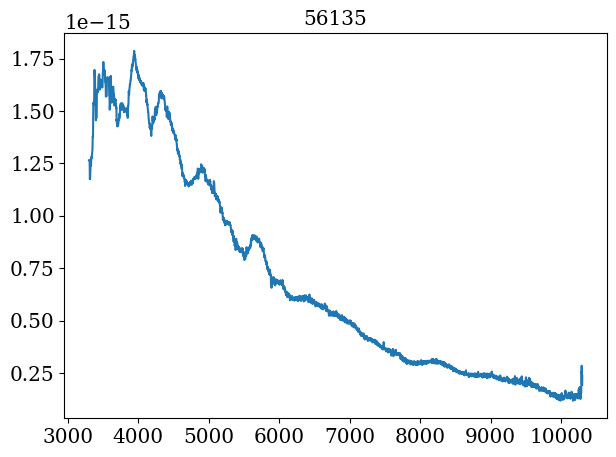

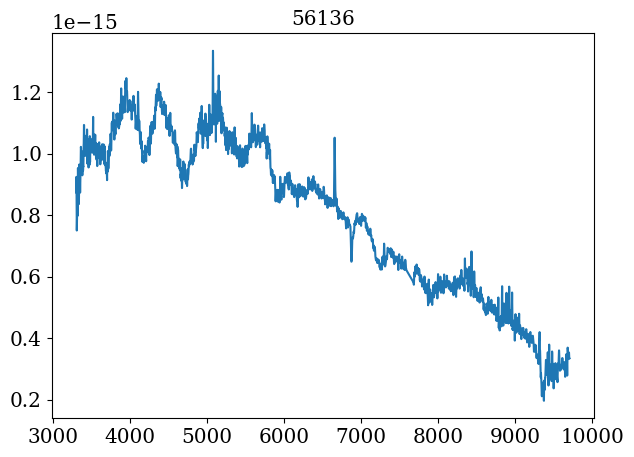

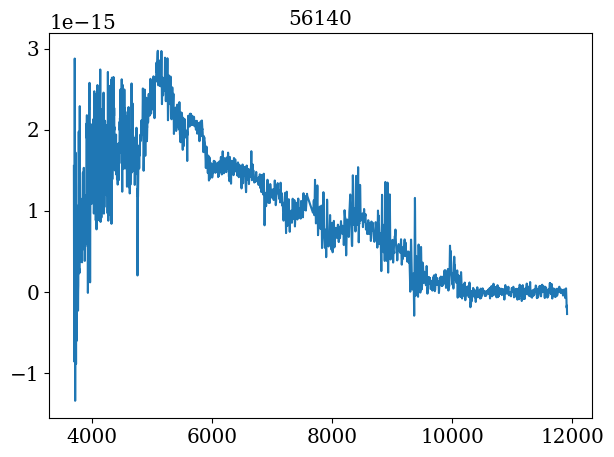

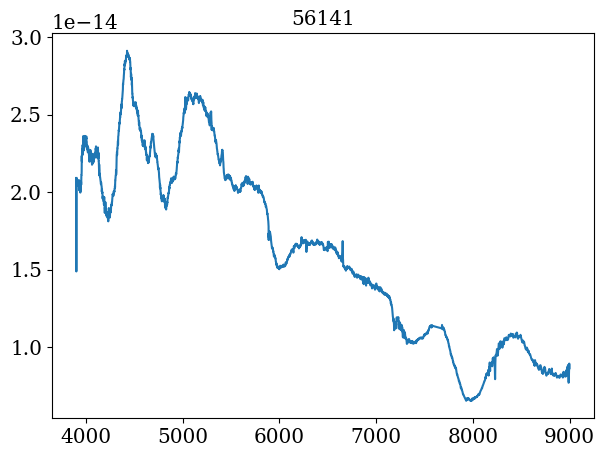

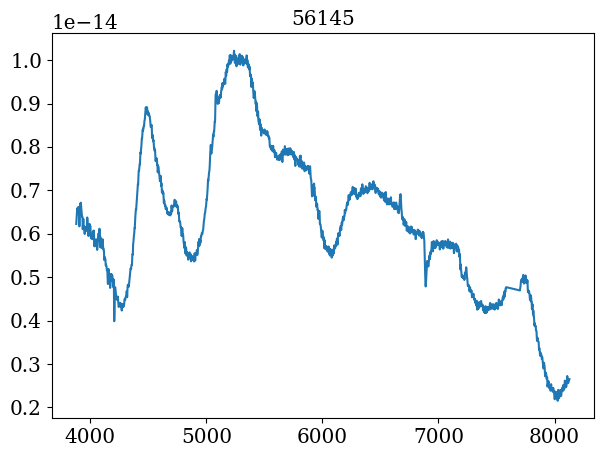

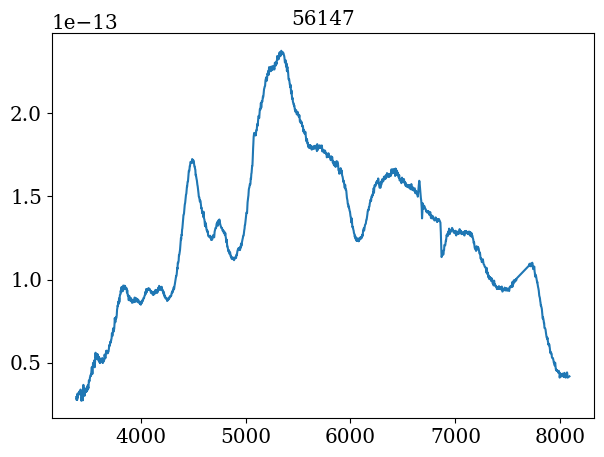

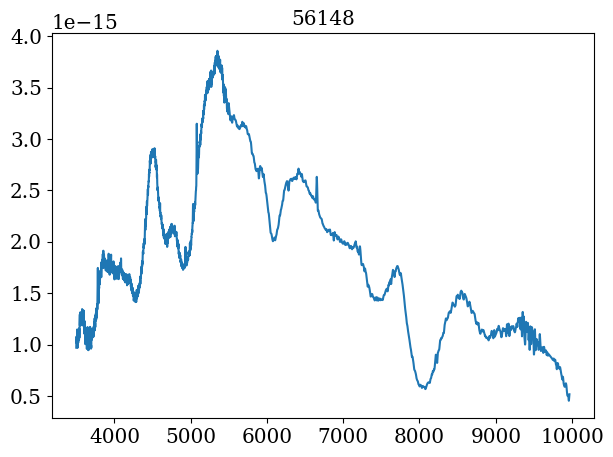

lala


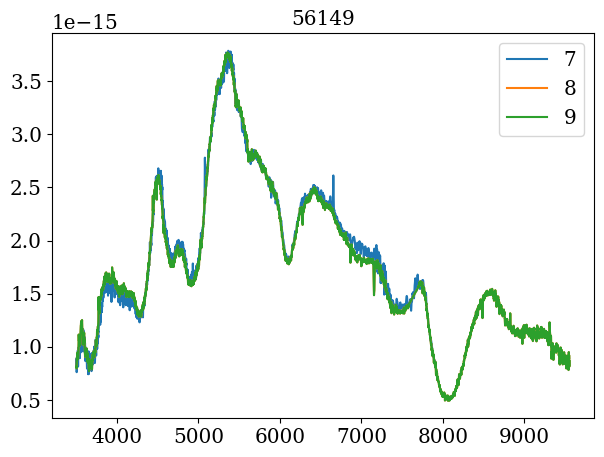

repite


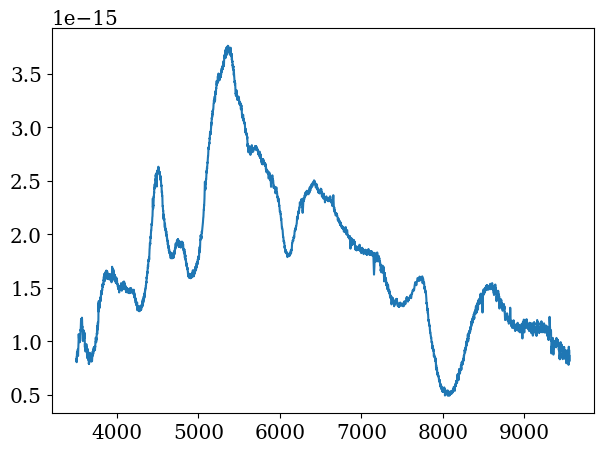

lala


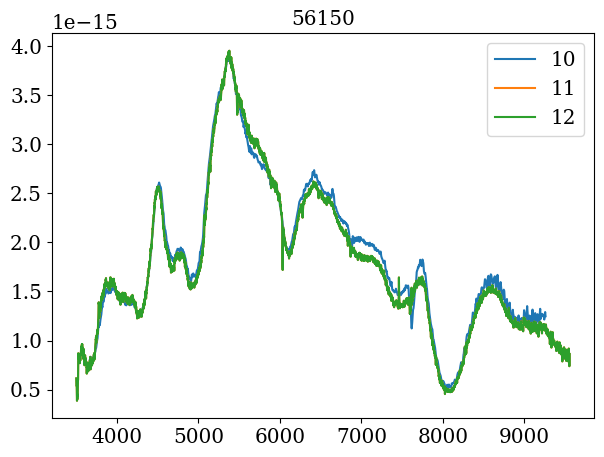

repite


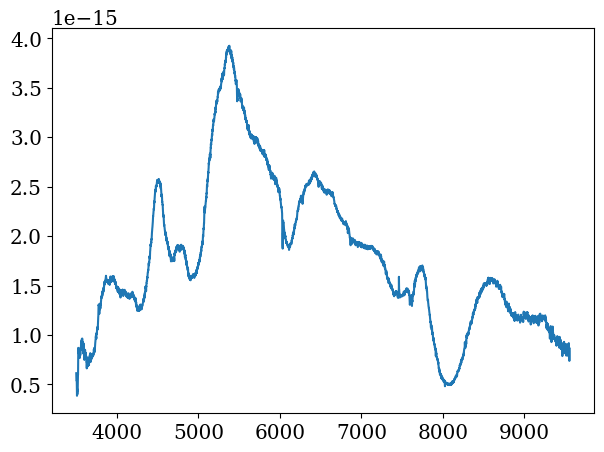

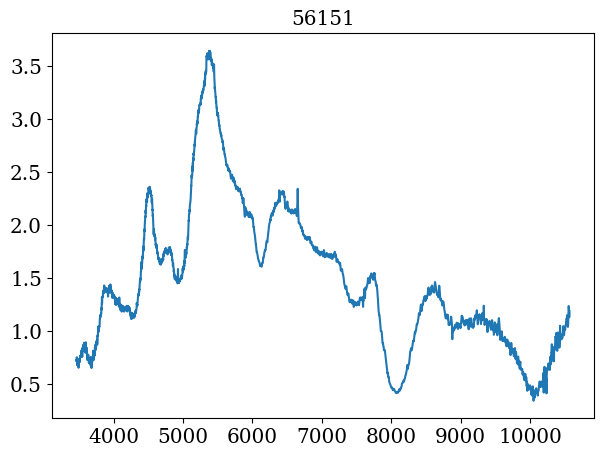

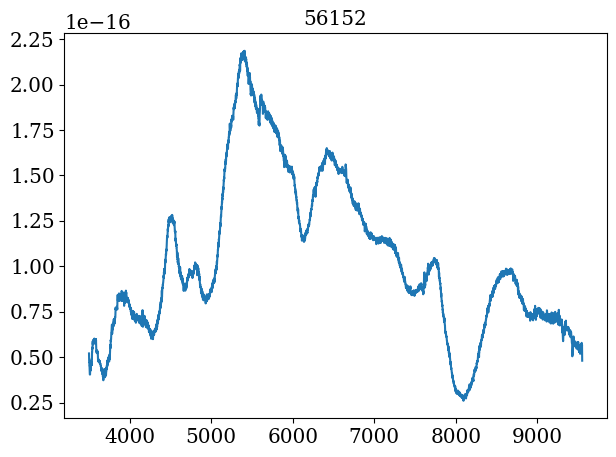

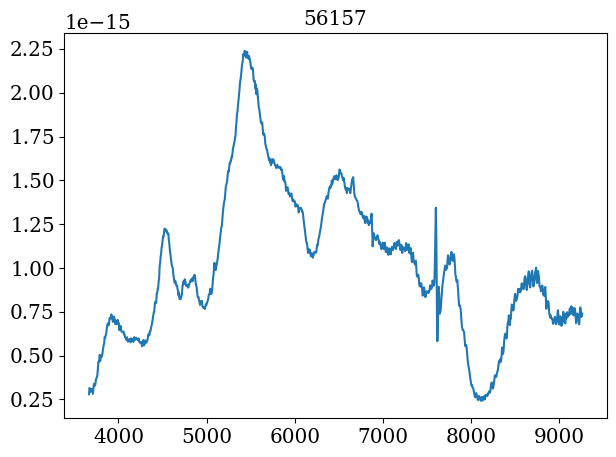

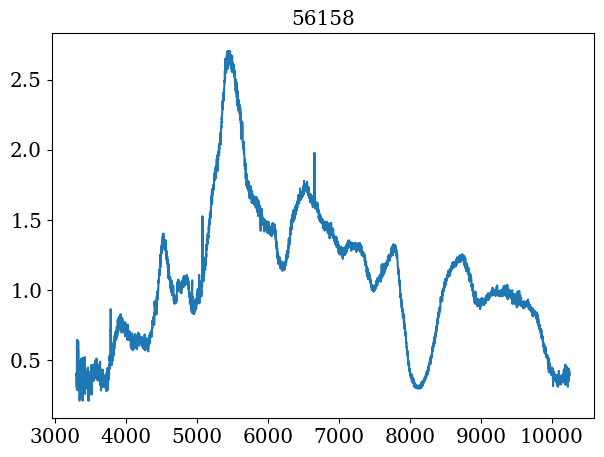

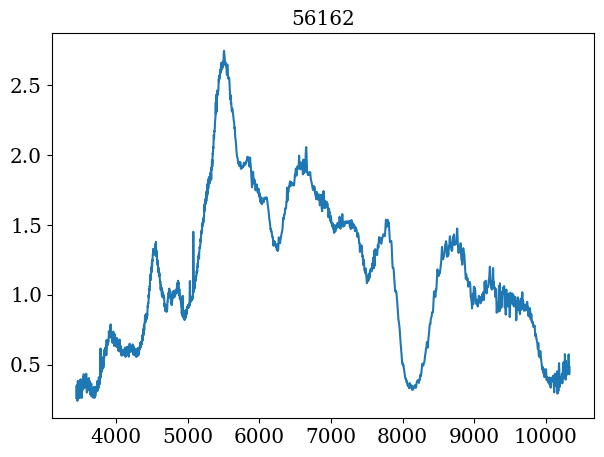

lala


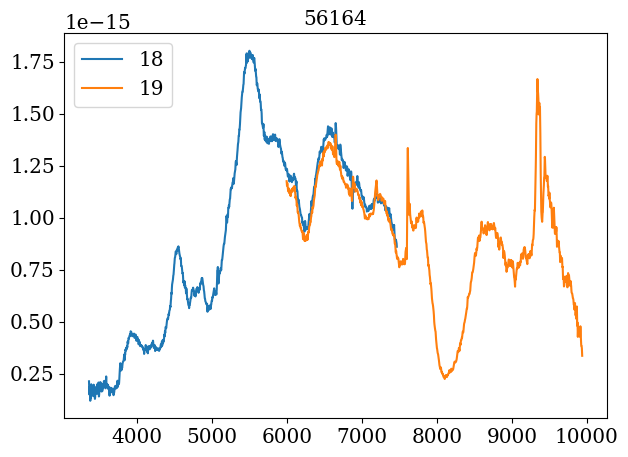

repite


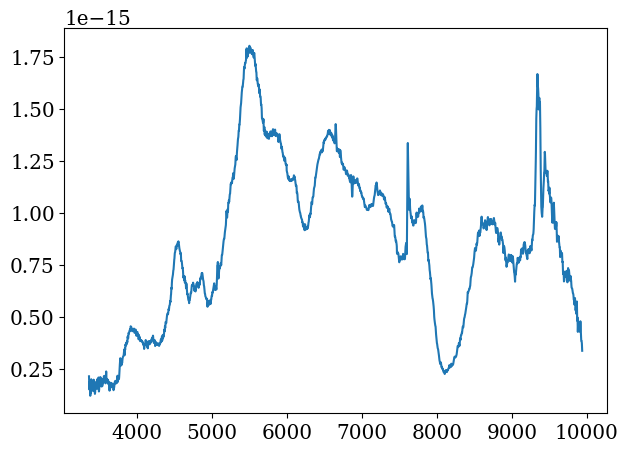

lala


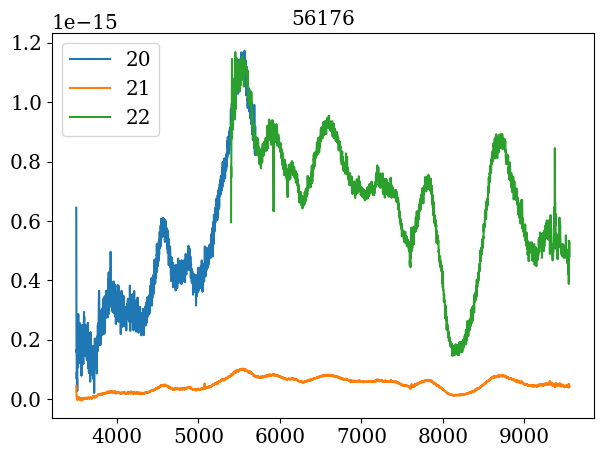

repite


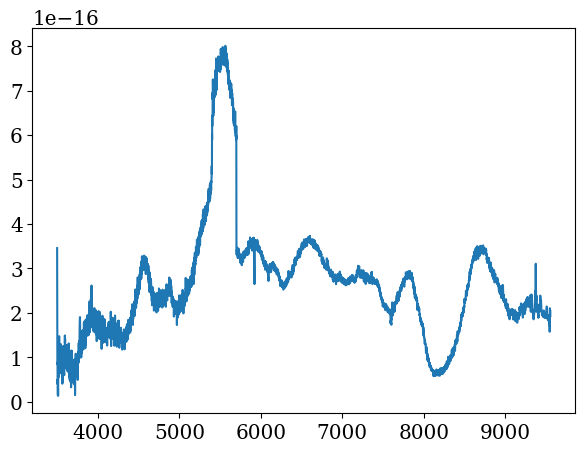

lala


C:\Users\mrami\anaconda3\envs\ALR_37\lib\site-packages\pandas\core\frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'flux_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,
C:\Users\mrami\anaconda3\envs\ALR_37\lib\site-packages\pandas\core\frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


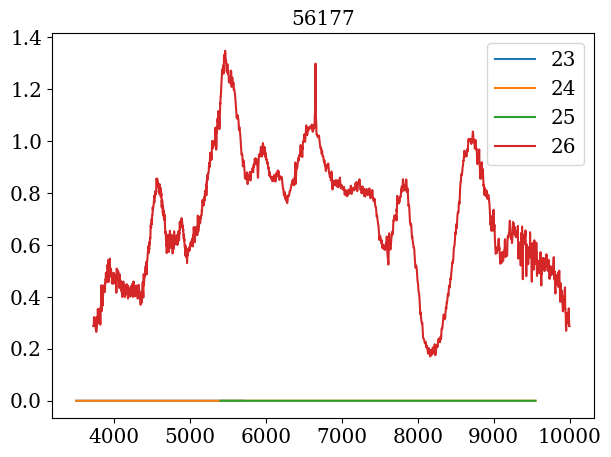

repite


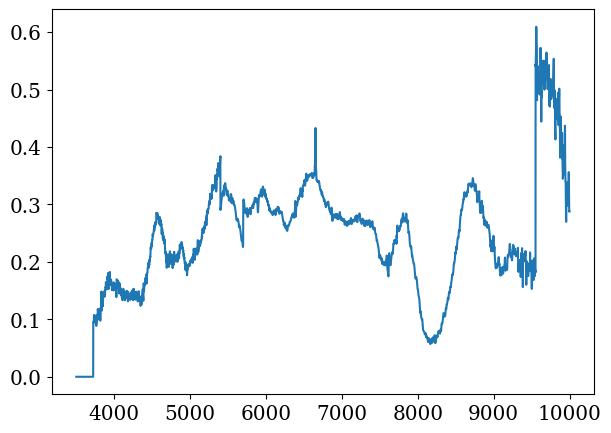

lala


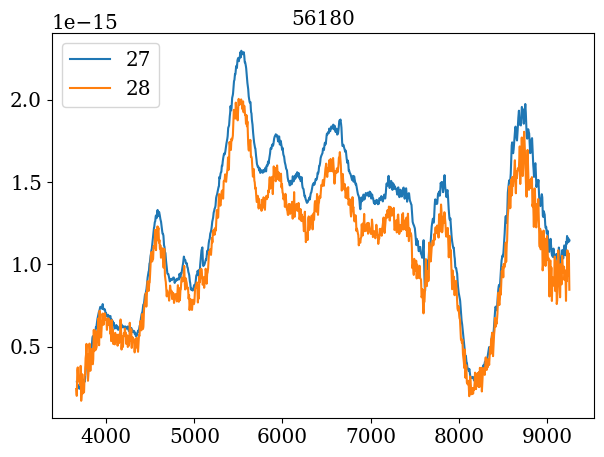

repite


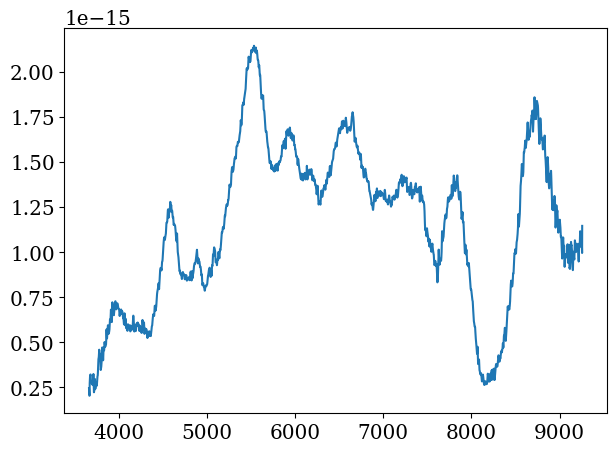

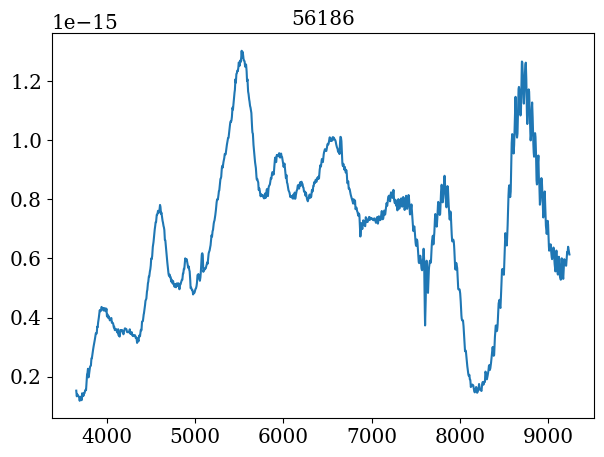

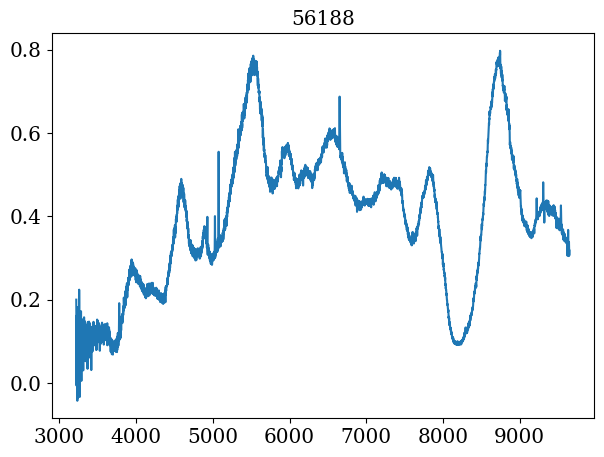

lala


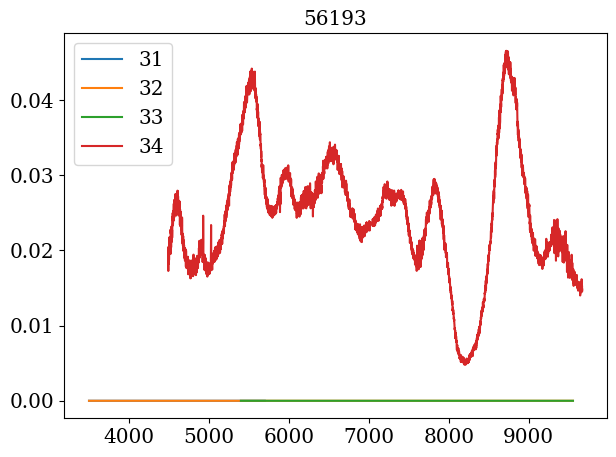

repite


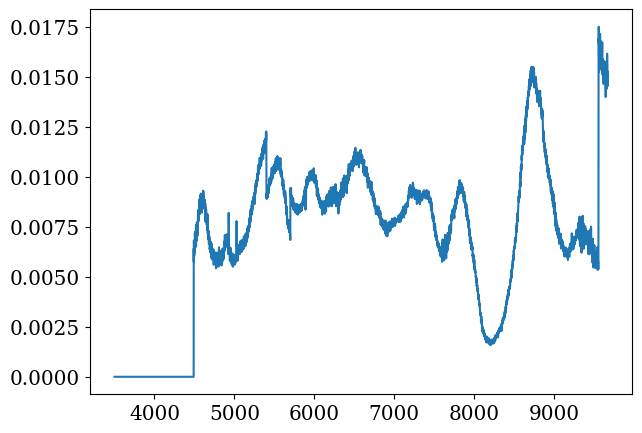

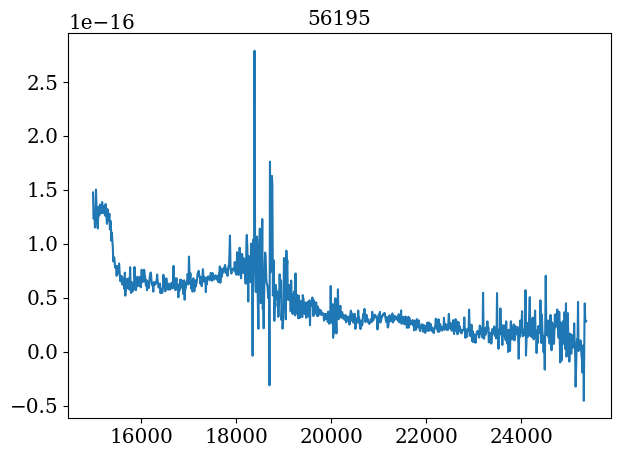

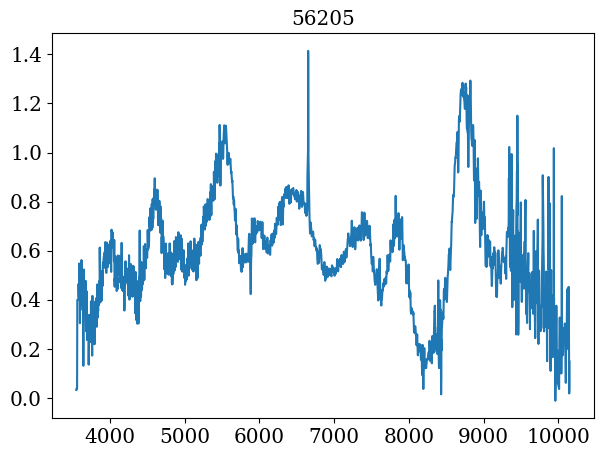

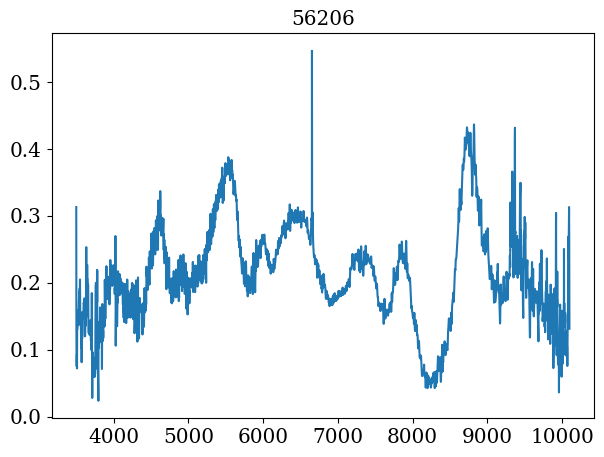

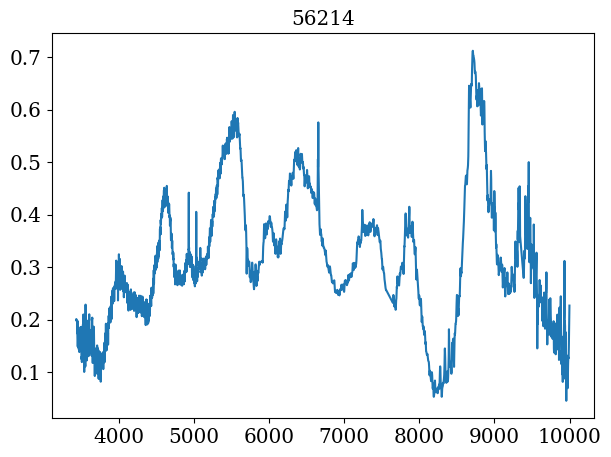

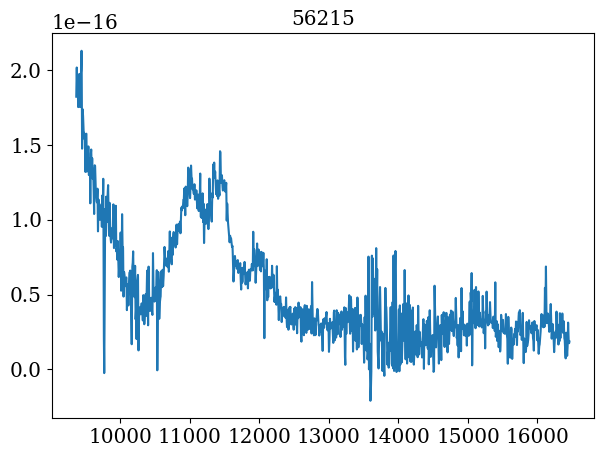

lala


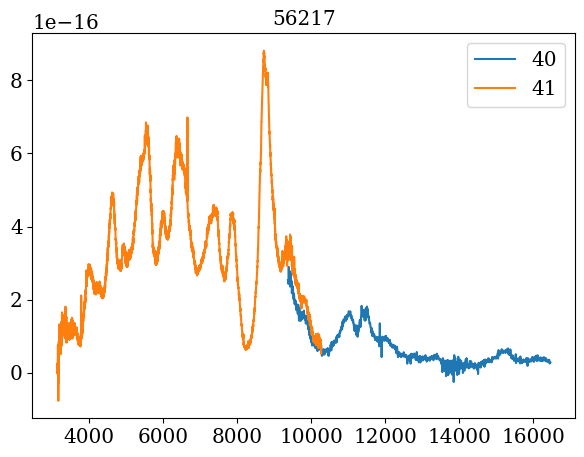

repite


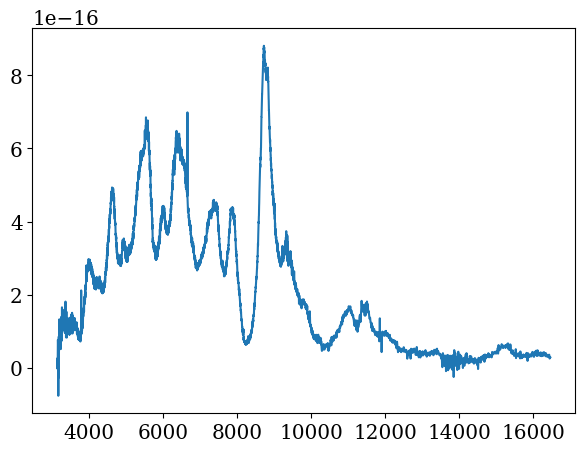

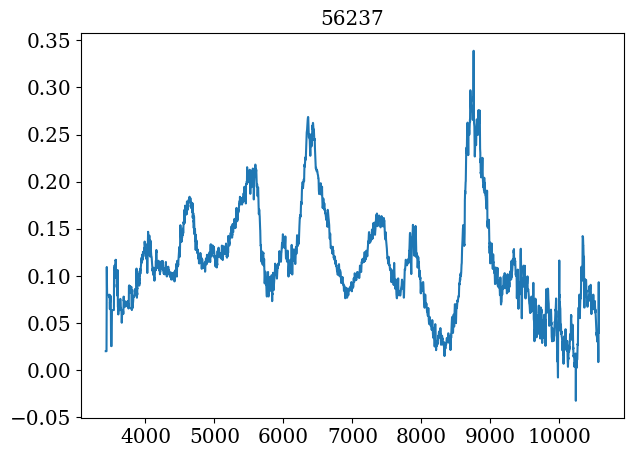

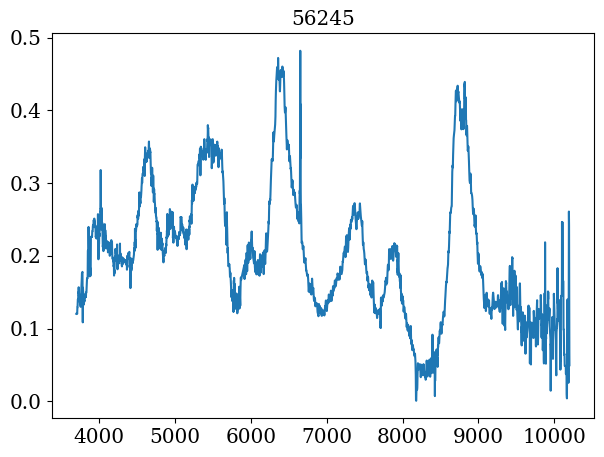

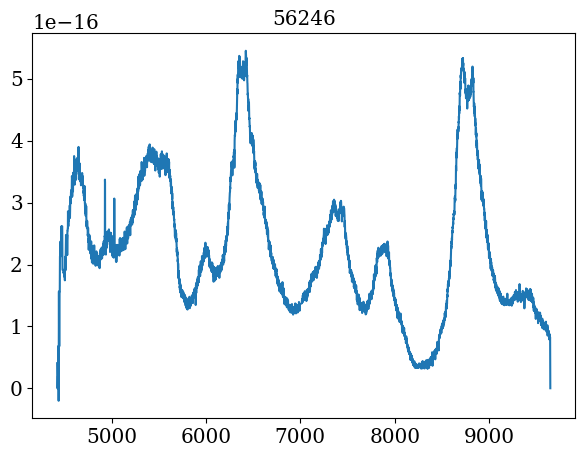

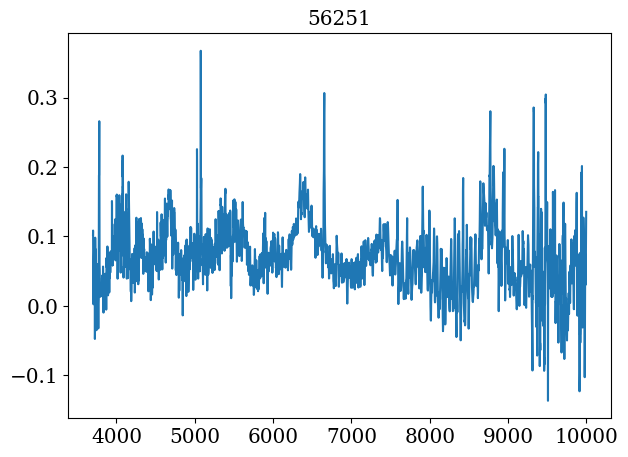

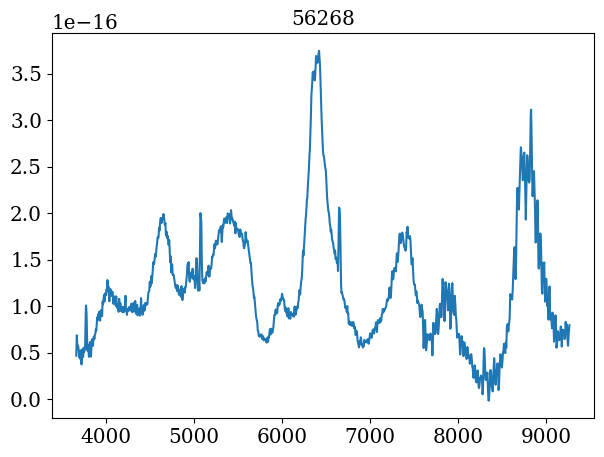

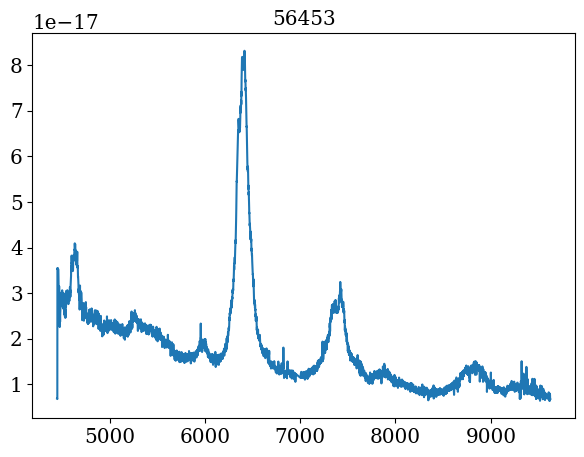

In [102]:
#corroboramos que nuestros espectros esten corregidos y creamos la nueva lista

new_espectro=[]
new_fases=[]
cont=0
for i in Ubicaciones.keys():
    espectro=pd.DataFrame([])
    
    if len(Ubicaciones[i])>1:
        espectro=[]#lista con los espectros clibrados
        for j in Ubicaciones[i]:
            ESPECTRO_df=ESPECTRO[j]
            plt.plot(ESPECTRO_df['wave'],ESPECTRO_df['flux'],label=j)
            #espectro=pd.concat((espectro,ESPECTRO_df),axis=0,ignore_index=True)
            espectro.append(ESPECTRO_df)
        #print(porcentajes[cont],cont)
        #prom=prom_spec(espectro,porcentajes[cont])# saco el promedio de los espectros calibrados 
        prom=prom_spec(espectro,len(Ubicaciones[i])*[1]) #asumo que  los espectros pesan lo mismo
        cont=cont+1
        
        print('lala')

        plt.legend()
        plt.title(i)
        plt.show()
        print('repite')
        plt.plot(prom['wave'],prom['flux'],'-')
        plt.show()
        new_espectro.append(prom)
        
    else:
        new_espectro.append(ESPECTRO[Ubicaciones[i][0]])
        plt.plot(ESPECTRO[Ubicaciones[i][0]]['wave'],ESPECTRO[Ubicaciones[i][0]]['flux'])
        plt.title(i)
        plt.show()
    new_fases.append(i)

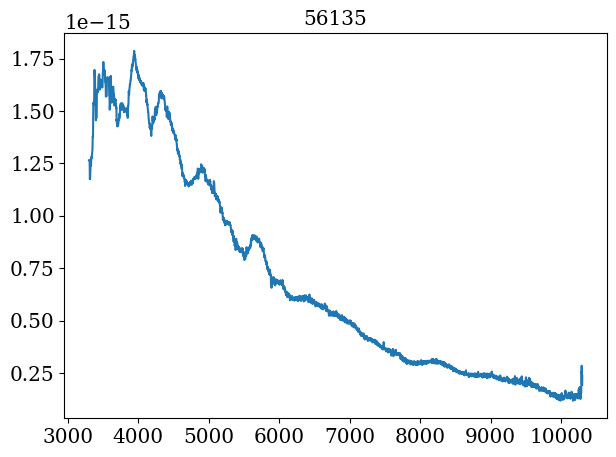

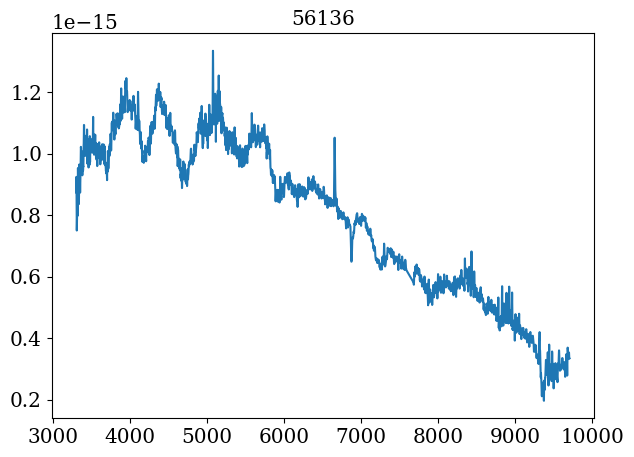

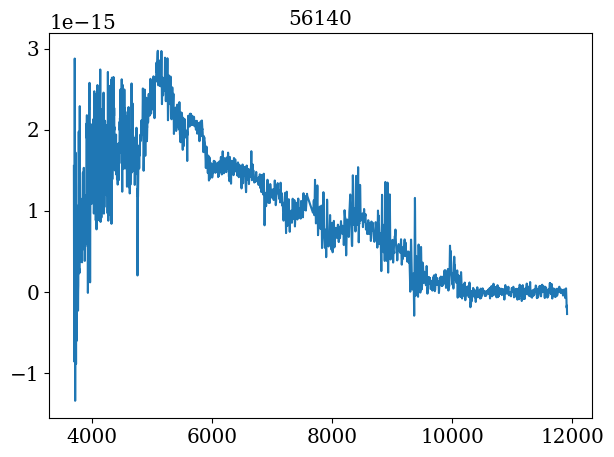

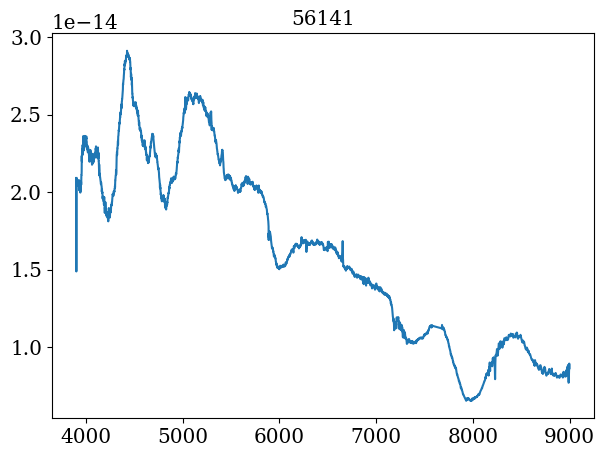

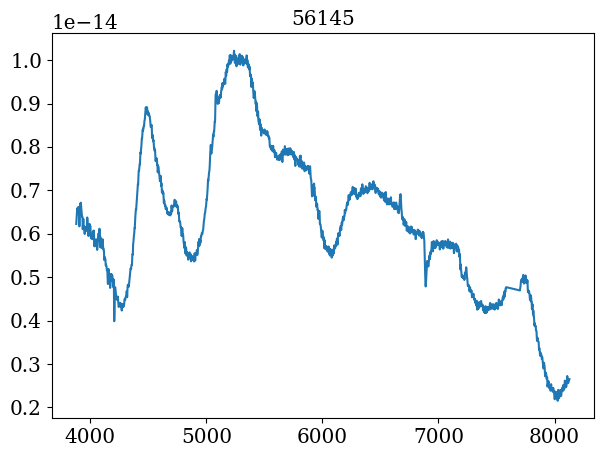

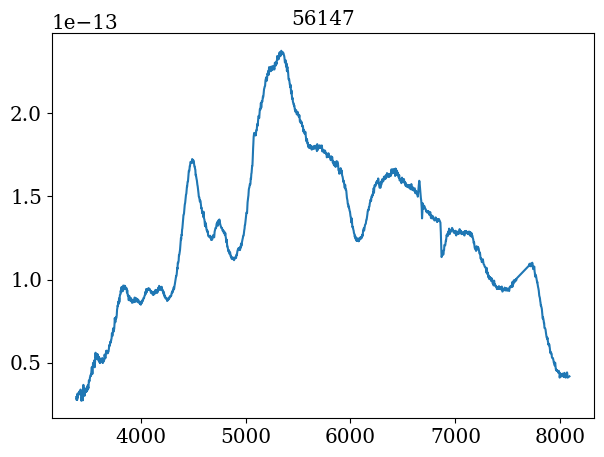

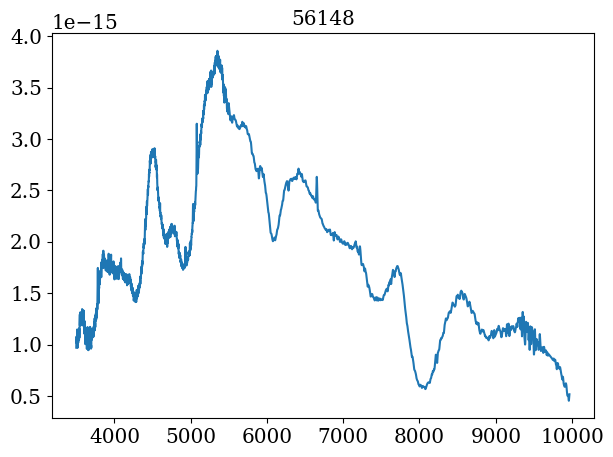

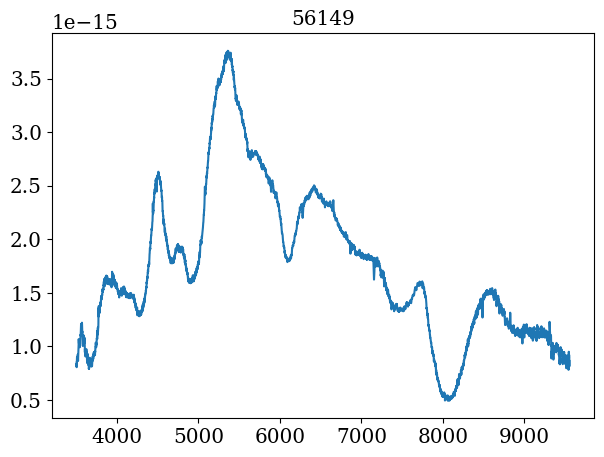

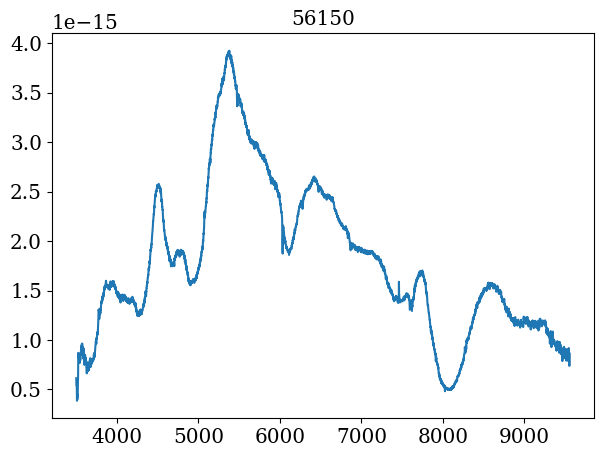

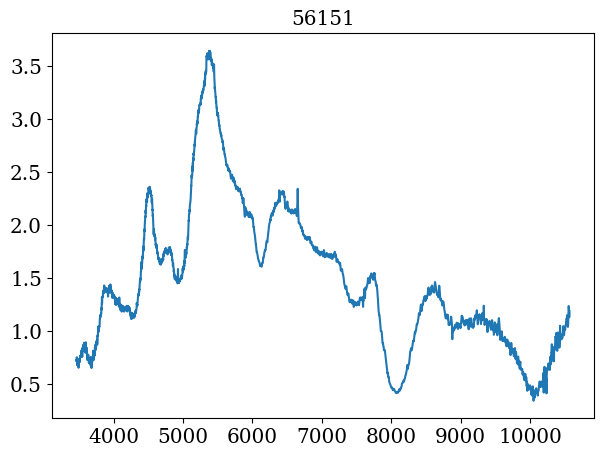

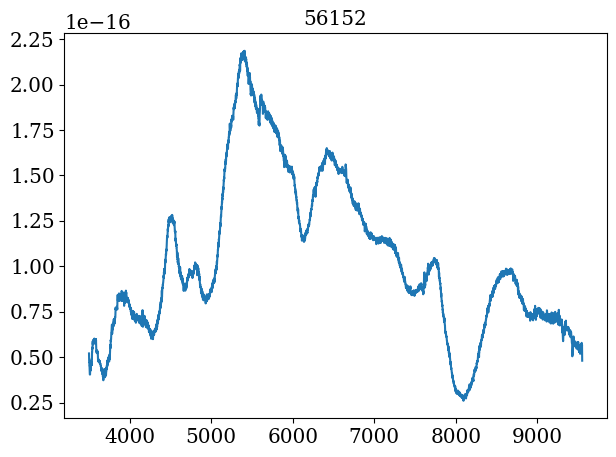

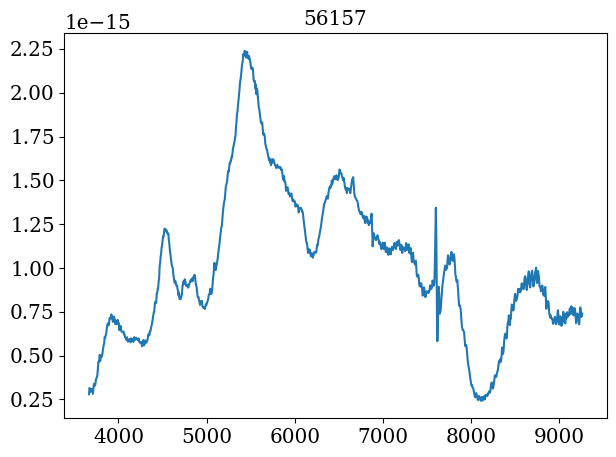

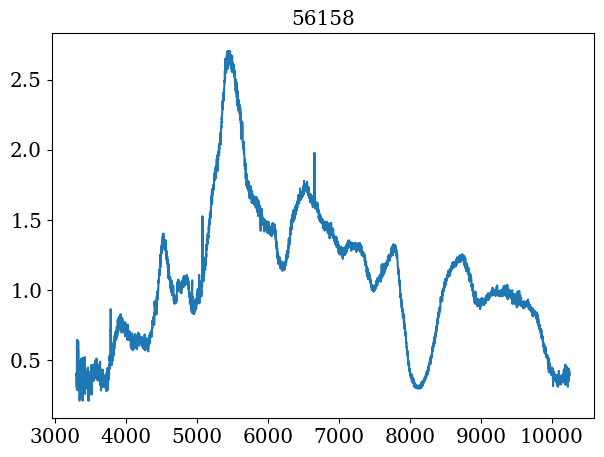

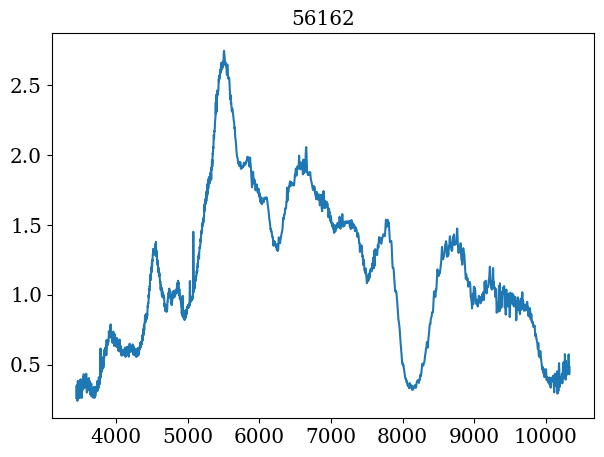

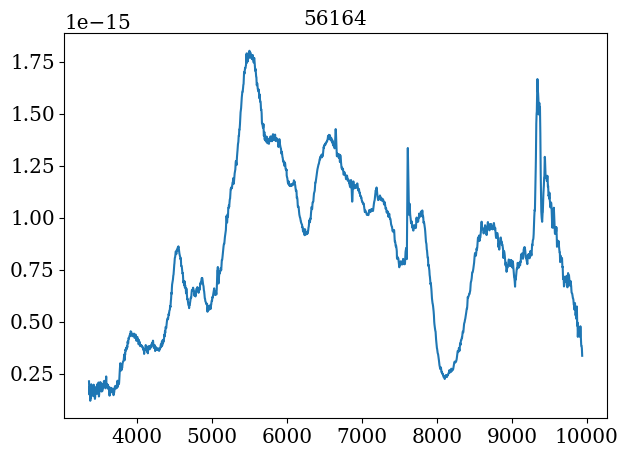

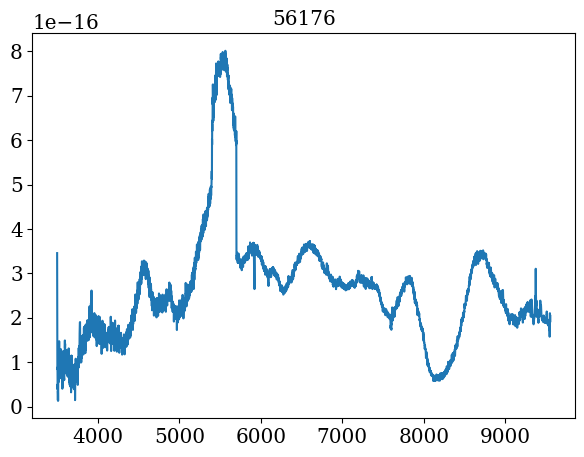

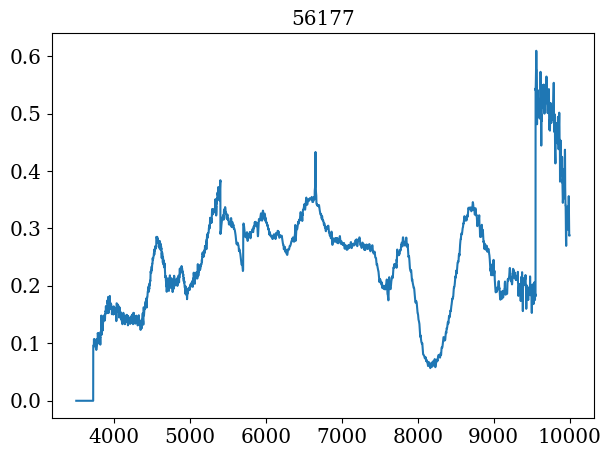

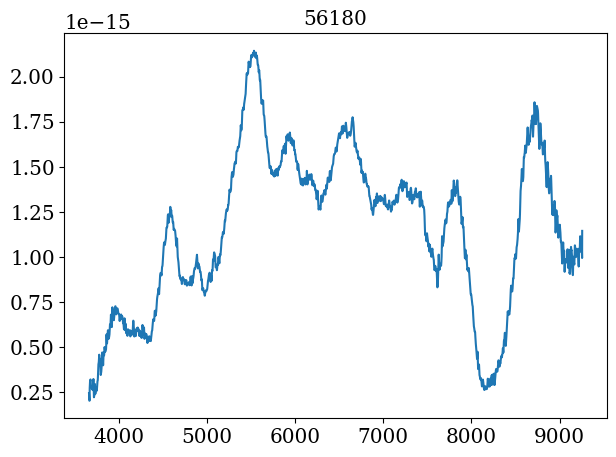

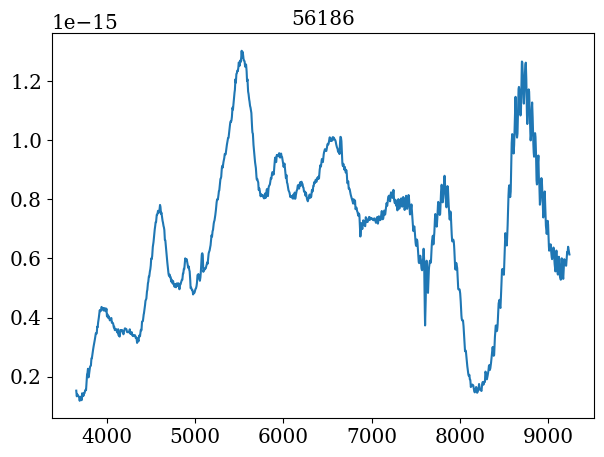

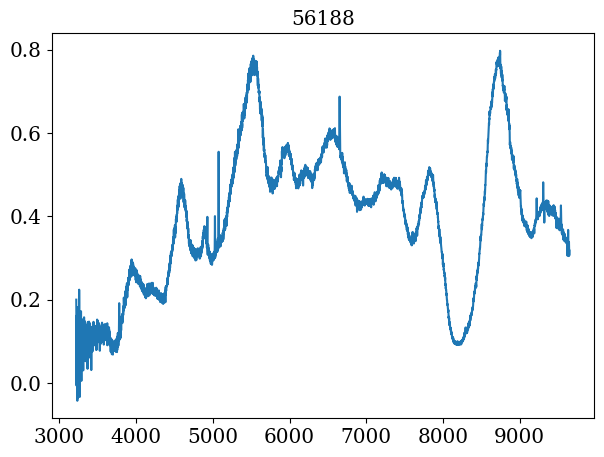

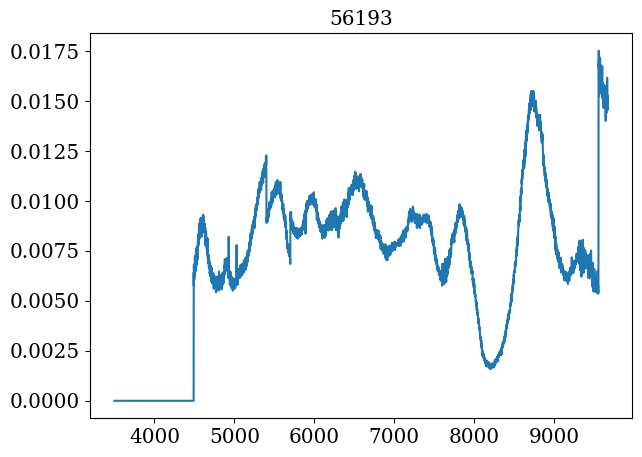

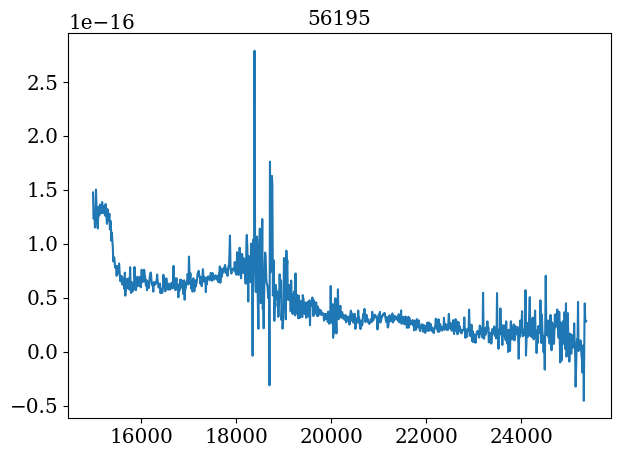

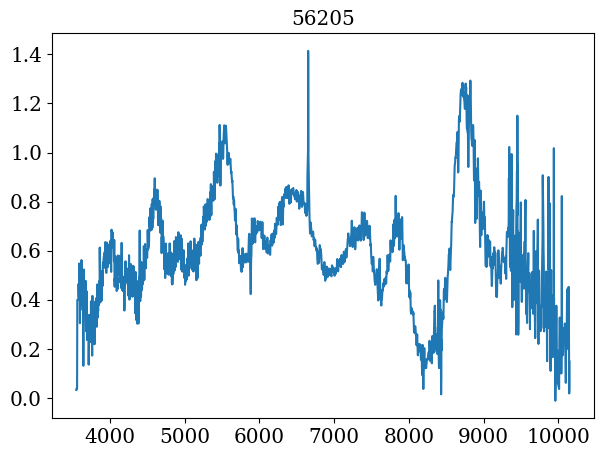

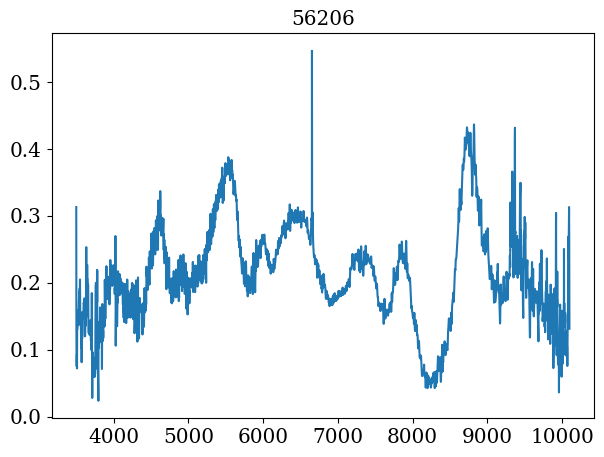

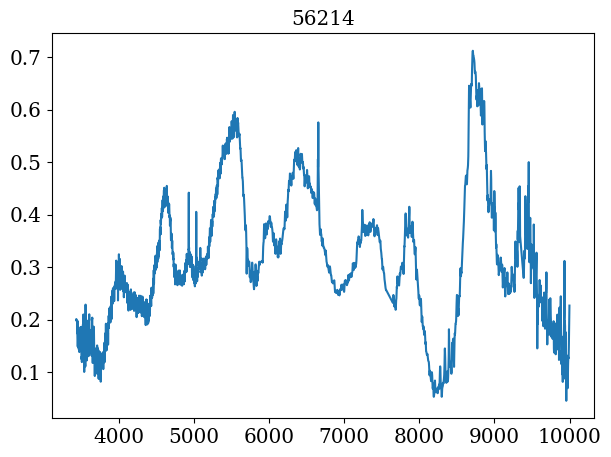

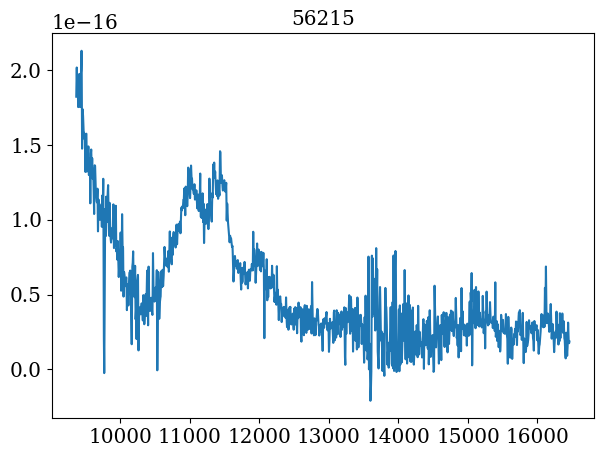

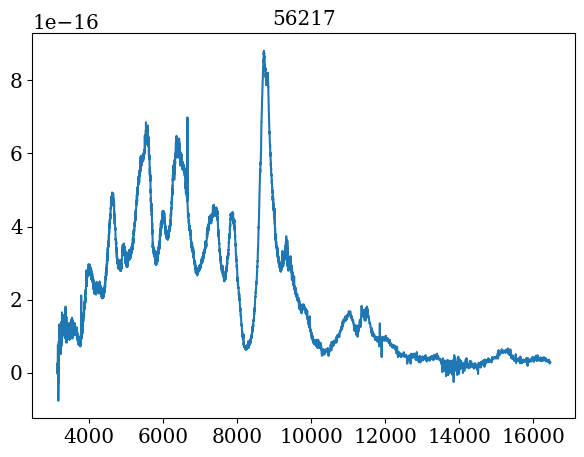

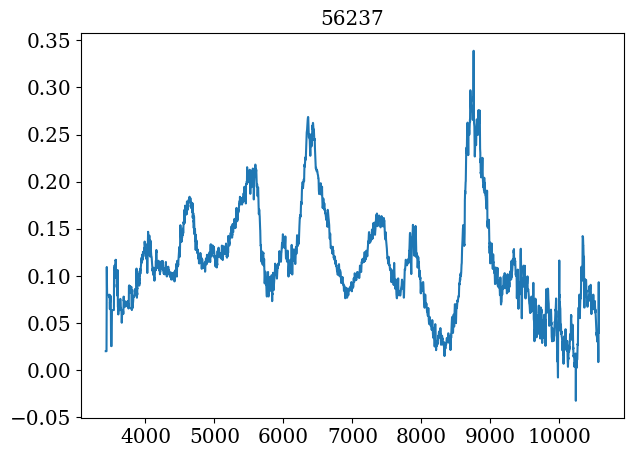

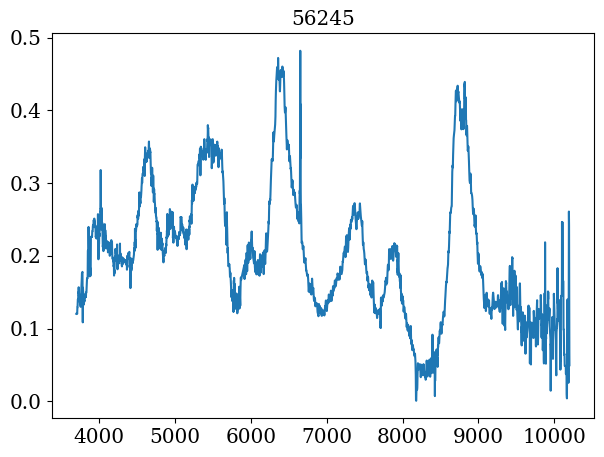

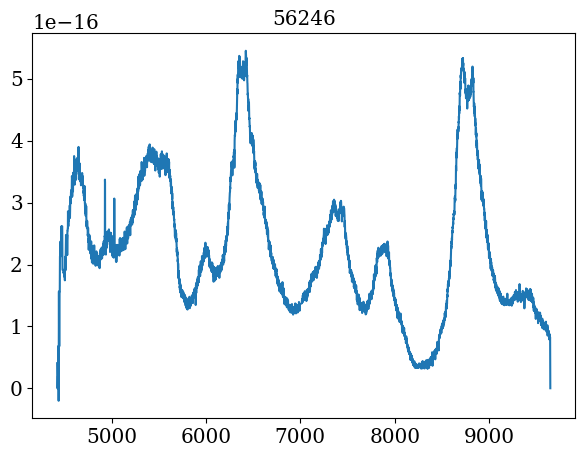

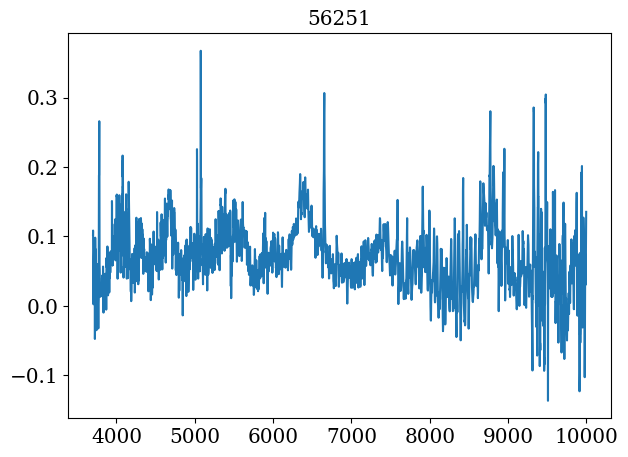

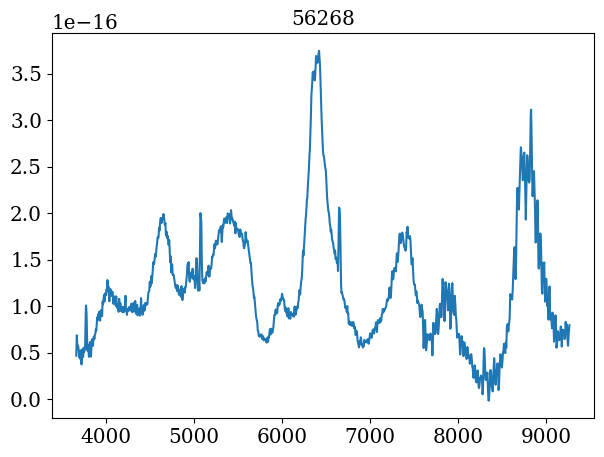

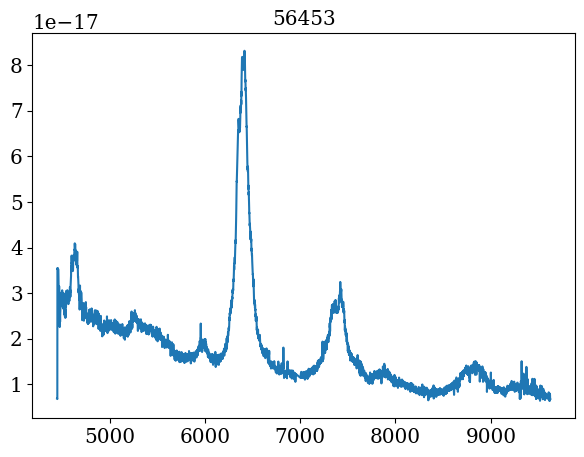

In [103]:
txt=open("G:\\Mi unidad\\Work\\Universidad\\Phd\\Practica2\\Ibc new sample\\spectra_unidos\\"+name+'_spectra.dat','w')
for i in range(len(new_fases)):
    new_espectro[i]=new_espectro[i].sort_values('wave')
    new_espectro[i].reset_index(drop=True,inplace=True)
    #LO ESCRIBIMOS EN EL ARCHIVO DE TEXTO
    txt.write('#\tSPEC\t?\tat\tMJD='+str(new_fases[i])+'\n')
    txt.write('#     WAVE     FLUX\n')
    for k in range(len(new_espectro[i])):
        txt.write('     '+'%.5f'%new_espectro[i]['wave'][k]+'        '+str(new_espectro[i]['flux'][k])+'\n') #lo guardamos con el formato deseado

    plt.plot(new_espectro[i]['wave'],new_espectro[i]['flux'],'-')
    plt.title(new_fases[i])
    plt.show()

TIENES Q USAR LA FOTOMETRIA SINTETICA YA CALIBRADA PARA PODER USAR ESE K??
PENSANDOLO BIEN CREO QUE NO, YA QUE AL USAR EL VALOR DE K CALIBRADO POR VARIAS BANDAS NO EESTOY CALIBRANDO EL ESPECTRO PARA UNA BANDA EN ESPECIFICO. ADEMAS QUE SI EL ESPECTRO ES CORTO, Y NO CABEN 2 BANDAS PARA CALCULAR EL RMS, NO TENDRIA ESTE VALOR DE K

SUPONGAMOS QUE USAMOS EL VALOR DE K SIN CALIBRAR DE UNA BANDA QUE CUBRA EL 100% o cerca

In [ ]:
#%%capture
%matplotlib nbagg
#%matplotlib inline
#sn_list=sn_list_3more
sn_list=['SN2013gh_spectra.dat']
ESPECTRO=new_espectro
fases=new_fases
for sn in sn_list:

   # if tipo=='Ic' or tipo =='Ib' or tipo =='IIb':
   #     ESPECTRO,fases=leer_spec(path_spec+'/'+sn,MJD=True)
   #     path_splines='/home/mauri/Escritorio/Universidad/Phd/Practica2/SNdata_oldpractice/Supernovas_def/Spectra_splines/'+tipo #donde se guardan los splines
#
   # else: #los otros tipos , Ia, II.
   #     ESPECTRO,fases=leer_spec(path_spec+'/'+sn)
   # 
   #     path_splines='/home/mauri/Escritorio/Universidad/Phd/Practica2/Spectra_splines/'+tipo #donde se guardan los splines
   #     
   # 
   # os.chdir(path_splines)
   # name=sn[:-12]
   # if len(fases)>2:
   #     #---Calculamos el spline y lo guardamos
#
   #     txt_spec_spline = open(str(name)+'_spline.txt','w') #archivo de texto donde se guardan los spline
#
   #     if tipo=='Ic' or tipo =='Ib' or tipo =='IIb':
   #          os.chdir('/home/mauri/Escritorio/Universidad/Phd/Practica2/SNdata_oldpractice/Supernovas_def/Spectra_splines_images/'+tipo)
   #     else: #para los otros tipos
   #         os.chdir('/home/mauri/Escritorio/Universidad/Phd/Practica2/Spectra_splines_images/'+tipo)
#
   #     import matplotlib.backends.backend_pdf
   #     pdf = matplotlib.backends.backend_pdf.PdfPages(name+'_splines.pdf')

        name=sn[:-12]
        for j in range(len(ESPECTRO)):

                ESPECTRO[j]=ESPECTRO[j].values.tolist()
            
                for zz in range(len(ESPECTRO[j])):
                    ESPECTRO[j][zz][0]=float(ESPECTRO[j][zz][0])
                    ESPECTRO[j][zz][1]=float(ESPECTRO[j][zz][1])
                ESPECTRO[j]=sorted(ESPECTRO[j])
                WAVE_SPEC=[] #longitud de onda del specro [j] 
                FLUX_SPEC=[] #flujo del spectro[j]

                for i in range(len(ESPECTRO[j])):
                    if np.isnan(ESPECTRO[j][i][1])!=True:
                        WAVE_SPEC.append(np.float(ESPECTRO[j][i][0]))
                        FLUX_SPEC.append(np.float(ESPECTRO[j][i][1]))

                WAVE_SPEC=np.array(WAVE_SPEC)
                FLUX_SPEC=np.array(FLUX_SPEC)


                #para eliminar los valores repetidos del wave------------------
                lista_original=WAVE_SPEC
                lista_original2=FLUX_SPEC
                WAVE_SPEC=[]
                FLUX_SPEC=[]
                for i in range(len(lista_original)):
                     if lista_original[i] not in WAVE_SPEC:
                        WAVE_SPEC.append(lista_original[i])
                        FLUX_SPEC.append(lista_original2[i])

                WAVE_SPEC=np.array(WAVE_SPEC)
                FLUX_SPEC=np.array(FLUX_SPEC)
                fig2=plt.figure(j)
                #ax = fig.add_axes([0,0,1,1])

                ####### AHORA HACEMOS EL SPLINE
                from scipy import interpolate
                cs = interpolate.interp1d(WAVE_SPEC, FLUX_SPEC,fill_value = "extrapolate")
                #cs = CubicSpline(WAVE_SPEC, FLUX_SPEC)
                xnew=np.arange(min(WAVE_SPEC),max(WAVE_SPEC)+1,5)
                diferencia=(xnew[0]-int(xnew[0]))

                xnew=xnew-diferencia

                #LO ESCRIBIMOS EN EL ARCHIVO DE TEXTO
                #txt_spec_spline.write('#\tSPEC\t?\tat\tMJD='+str(fases[j])+'\n')
                #txt_spec_spline.write('#     WAVE     FLUX\n')
                #for k in range(len(xnew)):
                 #   txt_spec_spline.write('     '+'%.5f'%xnew[k]+'        '+str(cs(xnew[k]))+'\n') #lo guardamos con el formato deseado

                #--GP---
                #xpred,ypred,sigma=GP(WAVE_SPEC,FLUX_SPEC,xnew)
                fig2 = plt.figure(j,figsize=(10,5))
                ax= fig2.add_subplot(111)

                ax.plot(xnew,cs(xnew),'-',color='orange',label='spline',alpha=0.5) #ploteamos el spline
                ax.scatter(WAVE_SPEC,FLUX_SPEC,s=3,label='data') #ploteamos el espectro de los datos
                #ax.text(1, 1, 'matplotlib', horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
                #plt.plot(xpred,ypred,'-',label='GP')
                plt.legend()
                ax.set_xlabel('WAVE')
                ax.set_ylabel('FLUJO')
                plt.title(name+' MJD='+str(fases[j]))



                plt.legend()
                plt.show()

                #pdf.savefig(fig2)
                
        #pdf.close()
        #os.chdir(path_splines)
    
    

In [ ]:
940/697